# Problem Statetment: 
    
    - To Identify Best Model To Enhance Term Deposit Sale. 
    
Project Objective: 
    
    - The goal is to predict whether a client will subscribe a term deposit (Target Variable ) with the help of a given set of independent variables. This is a real dataset collected from a Portuguese bank that used its own contact-center to do direct marketing campaigns to motivate and attract the clients for their term deposit scheme to enhance the business.
    - We have to build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
    

# Solution Approach : We Will Perform Our Model Building Process In The Following Steps
    1. Loading Data:
        
         - Load the given data into a dataframe to create series of records
         
    2. EDA :
          - Analysing each features closely to understand what it means
          - Finding the datatype of each attribute
          - Counting the target variable to see the data distribution for finding imbalance if any. 
          - Univariate, Bivariate, Multi-Variate Analysis  
          - Find any missing or irrlevent values, outliers & treat it
          - Finding the correlation of attributes to find the relevent one's
        
    3. Preparing The Data For Trainig & Testing The Models
    
           - Split the data into training & testing set using 70:30 as our proportion.
           - Understanding attributes & on-hot encoding them if they are not appropriate for analysis
           - See If Any scaling or normalization is required for the data to prepare it for better learning.
           
    4. Base Model Selection: 
           - Buidling various classification Model like Logistic Regression, KNN, Naive-Bayes, Random-Forrester, Decision Tree
           - Measuring each model score & performance Using Accuracy, Roc & Confusion Matrix
           - Selcting The Best Model As Our Base Model
            
     5. Ensemble Technique: To Build The Model
           
            - Build Ensemble Model Using diffrent classification Models
            - Measure its score and performance
            - Measure how it perfromed as compared to base model
            
     6. Tuning The Model Performance
            - Finding Key hyperparameter 
            - Understanding Regularization technique used in the selected model
            
            
          
With this Idea Let's Get Started
             
    

# 1 Loading The Bank Data To Generate DataFrame

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import os
dataframe = pd.read_csv("../input/bank-full.csv")
dataframe.head(45000)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,25,admin.,single,tertiary,no,2916,no,no,cellular,12,oct,143,1,-1,0,unknown,no
44996,75,retired,divorced,secondary,no,1092,no,no,telephone,12,oct,250,1,431,2,failure,no
44997,33,self-employed,single,tertiary,no,658,yes,no,cellular,12,oct,146,2,183,3,failure,no
44998,33,management,single,tertiary,no,131,yes,no,cellular,12,oct,209,3,427,2,failure,yes


# 2. Understanding Attributes: 

In [2]:
#Shape Of The Data, To See Total Row & Column Count

dataframe.shape



(45211, 17)

In [3]:
#Let's Get The Detail Data Info To Understand Each Independent Attribute, it's data type and its meaning
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Key Observation from the above dataframe.info() result 

Integer : int64 type values
    
  - There are 7 integer(Numeric) type attributes 
    age : Age Of customer
    Balance : The Customer Holds
    Day : Here means the last contact day of the week (which is a categorical value :'mon','tue','wed','thu','fri')
    duration: last contact duration, in seconds (numeric). 
    
     Important note: duration attribute highly affects the output target (e.g., if duration=0 then y(Target value)='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.So we will drop it going forward    
    
    Campaign: Here means the number of contacts performed during this campaign and for this client (numeric, includes last contact)
        
    pdays: pdays: Here means,the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
        
    previous: Here means number of contacts performed before this campaign and for this client (numeric) 
    
    
String : object type attribute 
    
There are 10 attribute which are of string type(Categorical)

     - Job: Here means, a type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
     - marital: Here means, marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed  
     - education: Here the level of eduaction of the customer, (categorical: primary, secondary, tertiary and unknown)                                     
     - default: means, customer has credit in default or not ? (categorical: 'no','yes','unknown')  
     - housing: mean, whether customer has a housing loan or not ? (categorical: 'no','yes','unknown')
     - loan: Means if customer has personal loan or not ? (categorical: 'no','yes','unknown')  
     - contact: means the type of contact communication which happened with the customer (categorical: 'cellular','telephone')                                       
     - month: last contact month of year when bank contacted with the customer (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
     - poutcome: here means what was the outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')   
                                            
     Target Variable :                                        
        Target: Means , has the client subscribed a term deposit? (binary: 'yes','no')                     
                                          
       
    

# Descriptive statistics

Univariate Analysis Of Continuous features:


In [4]:
dataframe.describe().T #using data tarnspose to have better view of each data. 

#dataframe.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


- Our describe() statitics method here only serve numerical attribute and major attibutes which are categorical in nature here is ignored.

Let's make some change in the method to including all atributes, to see if it makes any sense

Quick Insights From Descriptive Summary: 
    
Age 
 - Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
 - Age has mean and median almost equal to 40, it shows that the aga data is normally distributed

Balance: 
  - Averege bank balance is 1,362
  - Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.
  - Mean & Median value of the balance attribute has lot of difference which means you will find high level of data skewness and outlier in its distribution


There are not much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".    

# 2.1 : Removing Missing Data

As we can see from the above descriptive stats there seems to be no missing values 
But there are values like “unknown”, “others”, which are not adding any significance.
It's just like missing values. Thus, these ambiguous values are removed from the dataset.

In [5]:
# Step 1: Delete the rows in the 'poutcome' columns where values  is 'others' as it is not helping in any inferences

del_condition = dataframe.poutcome == 'others'
dataframe1 = dataframe.drop(dataframe[del_condition].index, axis = 0, inplace = False)
print("New dataframe 1 is :", dataframe1['poutcome'].value_counts())

New dataframe 1 is : unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


# 3.0 Data Distribution

   - We will perform univariate, bivariate & multivariate data distribution to understand how each attributes are behaving, how each attribute impacts each other
   
   - How our independent attributes impacts out target (Fixed Deposit) attributes
   - Visualize outliers, skewness and tails. 

# 3.1 UNIVARIATE ANALYSIS: 
    
1. Numerical Attributes: We will be Using histogram, countplot, boxplot

In [6]:

%matplotlib inline

# Let's see how the numeric data is distributed.

#dataframe['duration'] = dataframe['duration'].apply(lambda n:n/60).round(2)



Quick Observation:

AGE:
  - Age looks uniformally distributed with small standard deviation.
  - Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional
  -33 to 48 years old fall within the 25th to 75th percentiles
  - It seems that bank executve has also called up in the age group of 70-90 which are low in numbers but it is a clear error and kind of possible outlier,  as they can't be our target age group who will be ineterested in FD. 
  - It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will verify that in our bivariate analysis. 
  
Balance: 
  
   - Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going forward. 
   - There are around 7K, that is almost 10 % people  with negative bank balance which may not be interested in fd at all as they are struggling with finance. So this needs to be taken care from bank side that the call to such people needs to be minimized . 
   - The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

Duration : 
        - As observed from the historgram plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further studying.
        
Campaign: 

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.   
   

Let's Convert duration attributes from seconds to minute to have better measure and analysis

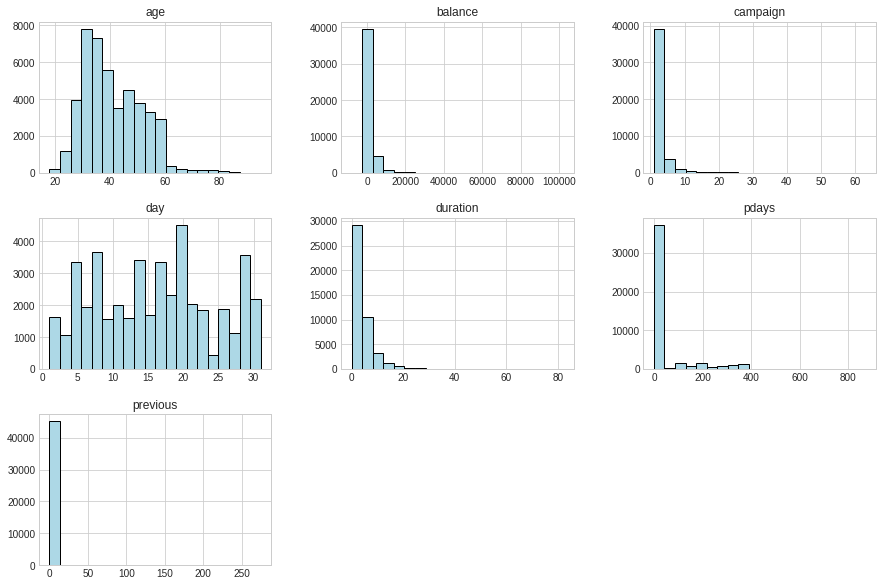

Descriptive stats of duration count    45211.000000
mean         4.302729
std          4.292132
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64
Descriptive stats of campaign count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
Descriptive stats of day count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
Descriptive stats of no of day past the capaign was last done:  count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [7]:
#Change the unit of 'duration' from seconds to minutes

newdf = dataframe.copy()

newdf['duration'] = newdf['duration'].apply(lambda n:n/60).round(2)

plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(15,10), color='lightblue', edgecolor = 'black')
plt.show()


#print("Descriptive stats of age",dataframe1['age'].describe())
print("Descriptive stats of duration",newdf['duration'].describe())
print("Descriptive stats of campaign",newdf['campaign'].describe())
print("Descriptive stats of day", newdf['day'].describe())
print("Descriptive stats of no of day past the capaign was last done: ", newdf['pdays'].describe())

# Quick Observation:

AGE:
  - Age looks uniformally distributed with small standard deviation.
  - Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional
  -33 to 48 years old fall within the 25th to 75th percentiles
  - There seems that bank executve has also called up in the age group of 70-90 which are low in numbers but it i a clear error as they can't be our target age group who will be ineterested in FD. 
  - It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will verify that in our bivariate analysis. 
  
Balance: 
  
   - Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going forward. 
   - There are around 7K, that is almost 10 % people  with negative bank balance which may not be interested in fd at all as they are struggling with finance. So this needs to be taken care from bank side that the call to such people needs to be minimized . 
   - The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

Duration : 
        - As observed from the historgram plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.
        
Campaign: 

    - Median value for no of times bank contacted  to the given customer is 2 times amd max value is 63 times which seems way to high than the normal. These clients may have some special requirement i feel. 

Day : seems to be normally dustributed,with median value of 16 being the last day of contact

pday  & Other numerical values doesn't help much to infer anything significant here. Infact most of the independent numerical attributes has nothing much to descibe(). We will have to do bivariate & multivariate analysis to catch some meaningful insights.  


# Boxplot(Univariate analysis) : For Numercial Attributes: 

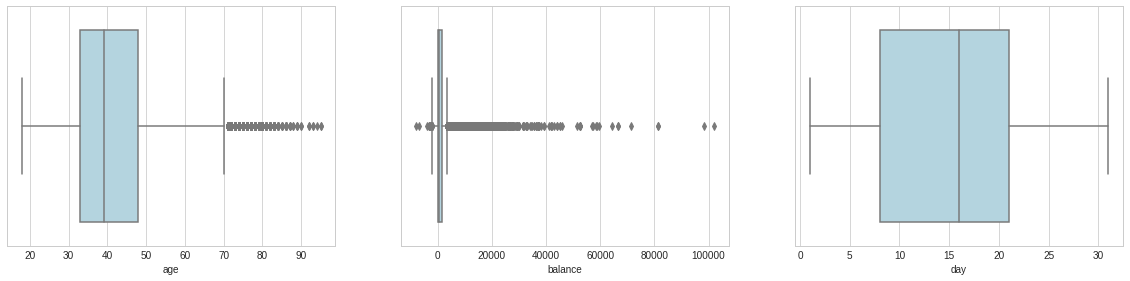

In [8]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf.age, color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.balance, color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.day, color='lightblue')

plt.show()

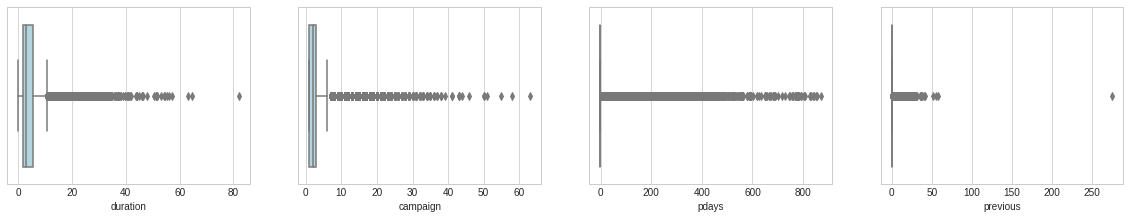

In [9]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= newdf.duration, color='lightblue')

plt.subplot(4,4,2)
sns.boxplot(x= newdf.campaign, color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= newdf.pdays, color='lightblue')

plt.subplot(4,4,4)
sns.boxplot(x= newdf.previous, color='lightblue')

plt.show()

# Quick Insights From Boxplot Univariate distribution: 
  - There seems to be an outlier in age, between the age group 70-90. 
  - Max customer falls in the age range of 32-48 . Median age is very close to 40 which i feel banks have targeted consideringf that they will will more aligned to take fd option. but i don't feel so. As the tendency of person nearing retorement or early starter in professinal, i feel can opt for fd. We will verify that going forward.
  
  - In balance attribute there seems to be high level of skewness which we also observed in our histplot analayis. There are some extreme outliers brtween 60k euro to 100k euro. There are long tails towards right side so it seems to be highly skewed. 
   -Balance attribute needs to be treated for removing the outlier which we will deal next. 
  - Day attribite seems to be normally distributed with no significant outliers as such. 
  - Rest of the numerical attribute doesn,t seems to be significant and are highly skewed with long tail mostly on the right side. As they are mostly skewed specially pdays and previous days,. There is nothing to statistically find here. 
  
  Let's treat outlier in balance attribute below: 

# Removing Outler In Balance Attribute: 
- As we found the oultiers in balance column abive in our descriptive stats , let's find and treat them. 
   - Also let,s print skew values for all numerical attributes  
   - We will make use of zscore here for the same
   - Outliers are defined as the values which are more than three standard deviations away from the mean

In [10]:
#SKEWNESS

from scipy.stats import zscore
import scipy.stats as stats

#Let's check Skew in all numercial attributes


Skewness = pd.DataFrame({'Skewness' : [stats.skew(dataframe1.age),stats.skew(dataframe1.day),stats.skew(dataframe1.balance),stats.skew(dataframe1.duration),stats.skew(dataframe1.campaign),stats.skew(dataframe1.pdays),stats.skew(dataframe1.previous) ]},
                        index=['age','day','balance', 'duration', 'campaign', 'pdays', 'previous'])  # Measure the skeweness of the required columns
Skewness 



,Skewness
age,0.684795
day,0.093076
balance,8.360031
duration,3.144214
campaign,4.898488
pdays,2.615629
previous,41.845066


Quick Insights:

We will interpret the skewness number, using Bulmer (1979) — a classic — suggests this rule of thumb:

If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
If skewness is between −½ and +½, the distribution is approximately symmetric.


    - age & day seems to be doing ok in terms of skewness
    - while balance , duration, campaign, pdays, previous are highly skewed and seems to have lot of outlier
    
 We visualized the outliers and skewness when we plotted the distributon of the numercial data using boxplot above.    
    

We managed to get rid to some extreme outlier shown below. 


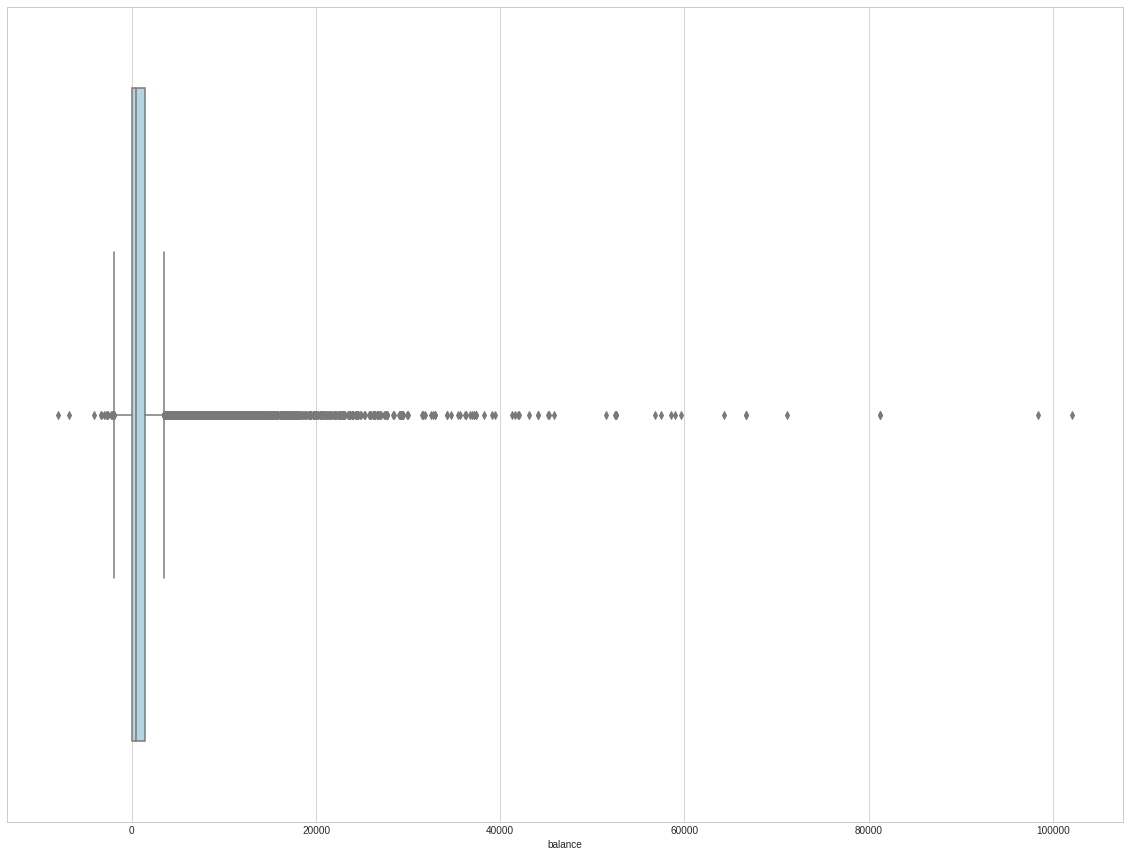

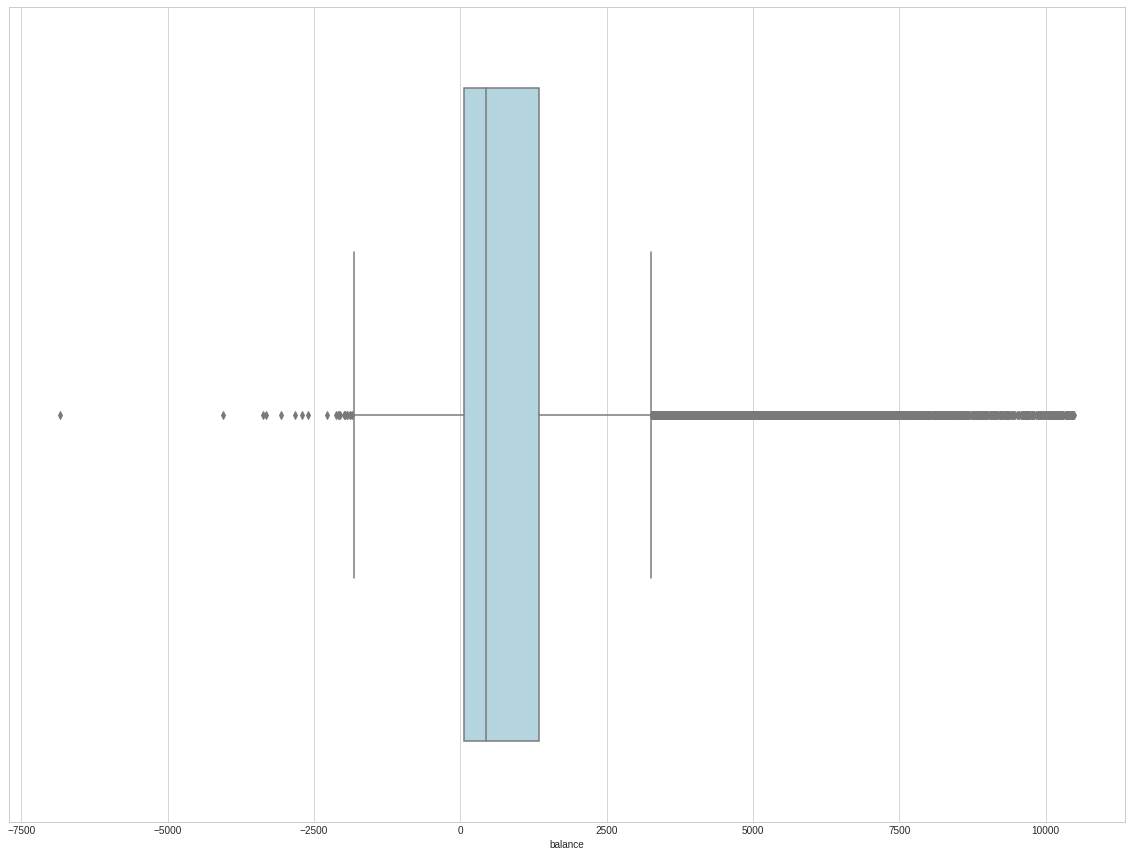

In [11]:
#Removing outliers in balance data using zscore:

from scipy.stats import zscore

newdf[['balance']].mean()
newdf[['balance']].mean()

newdf['balance_outliers'] = newdf['balance']
newdf['balance_outliers']= zscore(newdf['balance_outliers'])

condition1 = (newdf['balance_outliers']>3) | (newdf['balance_outliers']<-3 )
newdf1 = newdf.drop(newdf[condition1].index, axis = 0, inplace = False)
newdf2 = newdf1.drop('balance_outliers', axis=1)

#original one 
plt.figure(figsize= (20,15))
sns.boxplot(x= newdf.balance, color='lightblue')

#After outlier treatment using z score

plt.figure(figsize= (20,15))
sns.boxplot(x= newdf2.balance, color='lightblue')
print("We managed to get rid to some extreme outlier shown below. ")


In [12]:

objdf = newdf.select_dtypes(include ='object') 
objdf.head(5)


,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


# Univariate Analysis: Categorical Data
 We will be making use of countplot to visulaize categorical distribution of the data

job count distribution :  blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

x1 marital attribute count:  married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

x2 education level count distribution:  secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

x3 Credit default count distribution:  no     44396
yes      815
Name: default, dtype: int64

x4 housing loan count distribution:  yes    25130
no     20081
Name: housing, dtype: int64

Personal loan count distribution:  no     37967
yes     7244
Name: loan, dtype: int64


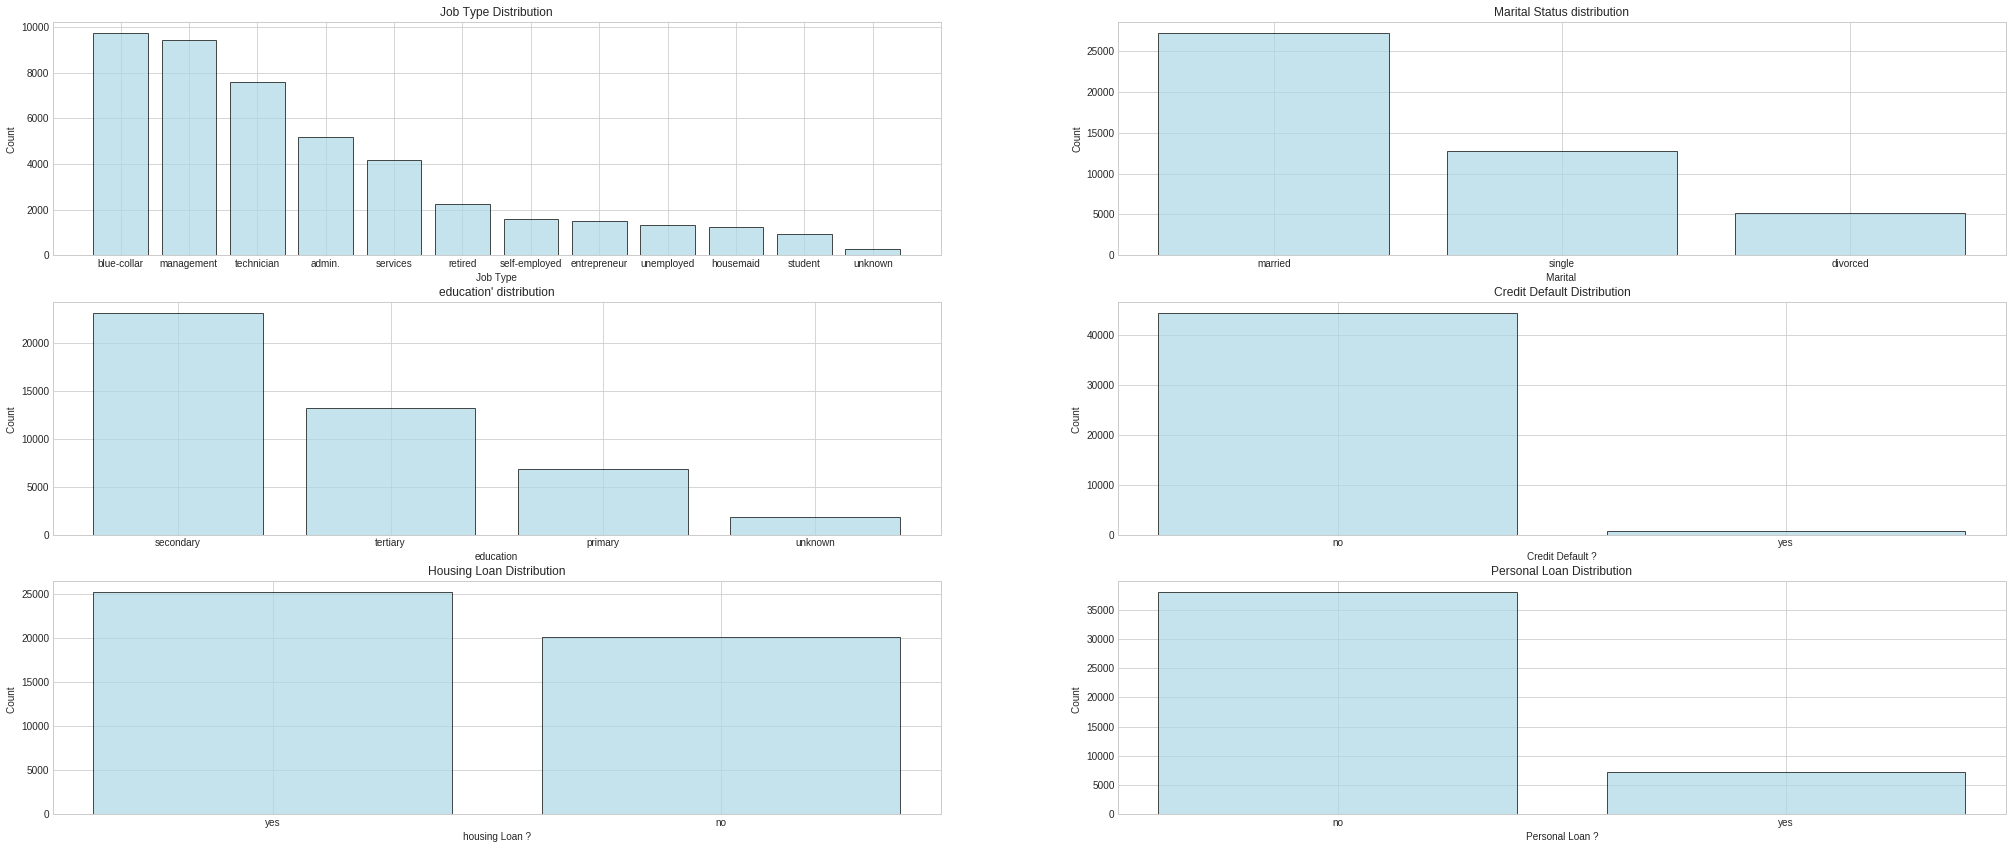

In [13]:


plt.figure(figsize=(35,30))

#Job category

x = newdf.job.value_counts().index    #Values for x-axis
print("job count distribution : ", newdf.job.value_counts())
y = [newdf['job'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(6,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Job Type')
plt.ylabel('Count ')
plt.title('Job Type Distribution')


#Marital Status 
x1 = newdf.marital.value_counts().index    #Values for x-axis
y1 = [newdf['marital'].value_counts()[j] for j in x1]   # Count of each class on y-axis

print("\nx1 marital attribute count: ", newdf.marital.value_counts())
plt.subplot(6,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Marital ')
plt.ylabel('Count')
plt.title('Marital Status distribution')

#education level

x2 = newdf.education.value_counts().index    #Values for x-axis
y2 = [newdf['education'].value_counts()[k] for k in x2]   # Count of each class on y-axis

print("\nx2 education level count distribution: ", newdf.education.value_counts())

plt.subplot(6,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('education')
plt.ylabel('Count ')
plt.title("education' distribution")

#credit defaulter or not?

x3 = newdf.default.value_counts().index    #Values for x-axis
y3 = [newdf['default'].value_counts()[l] for l in x3]   # Count of each class on y-axis

print("\nx3 Credit default count distribution: ", newdf.default.value_counts())
plt.subplot(6,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Credit Default ?')
plt.ylabel('Count ')
plt.title("Credit Default Distribution")

#housing loan availed or not 

x4 = newdf.housing.value_counts().index    #Values for x-axis
y4 = [newdf['housing'].value_counts()[m] for m in x4]   # Count of each class on y-axis

print("\nx4 housing loan count distribution: ", newdf.housing.value_counts())
plt.subplot(6,2,5)
plt.bar(x4,y4, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('housing Loan ?')
plt.ylabel('Count ')
plt.title("Housing Loan Distribution")

#Personal Loan
x5 = newdf.loan.value_counts().index    #Values for x-axis
y5 = [newdf['loan'].value_counts()[n] for n in x5]   # Count of each class on y-axis
print("\nPersonal loan count distribution: ", newdf.loan.value_counts())
plt.subplot(6,2,6)
plt.bar(x5,y5, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Personal Loan ?')
plt.ylabel('Count ')
plt.title("Personal Loan Distribution")
plt.show()

> #Quick Observation On The Above Categorical Plot

Job Type Distribution: 
    
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288

Job: 
- Blue-Collar, Management professionals & technicican jobs are in majority which were targeted by the bank. 
- There are some cutomers who are unemployed, housemaid, student which were also targeted, which is not the good move as mostly they will not convert as fd customer. Though they are not significant in numbers
- There are few unknowns(around 220) people who were targeted, which don't seems to be a value addition so these needs to be ignored 
- There are also some entrepreneurs and self-employed people which i feel will be hard to convert as fd customer. Chance of entrepreneurs and sel-employed person having FD i feel will be low. We will be verifying that when we do the bivariate analysis on categorical values using Target as hue. 


MaritalStataus:

married     27214
single      12790
divorced     5207

  - ALmost 50% counting to 27214, customers are married which is as expected as they are more saving conscious. 
  - 28 % people are single , we expect more convesion rate from young single working professional,we will verify that when we do bivariate analysis
  - There are some broken customers who are divorced, they account for 11 %,  we should not expect them to convert to fd customers. That we will check going forward. 
  

EDUCATION: 

Education Level Distribution:

secondary    23202
tertiary     13301
primary       6851
unknown       1857

   - It seems that around 51 % of the targeted customers are having secondar level of education and around 29 % customers are having qualification beyoind 12th class. It means that the targeted customers 51 % with secondary level education is somewhat not as per expectation and the campaign will not bear fruitful result. We neded to rethink the target audience here. Our focus should be more on working profesionals whose qualification will be beyound secondary level. 
   
  -  We also found some unknown customers whose level of education is not clear this needs to be ignored or resampled.
  
  - Arounf 6851 customers are still studying and should not be our target audience.They are very less liskely to take fd option. We will verify the same going forward. 
  
  
  
Credit Default:

Distribution: 
No :  44396
yes : 815
    
    - It is good to see that almost 98 %  of the targeted customers don't default 
     - Only 815 out 45211 people are defaulter and are not credit worthy. These people needs to be ignored while targeting for fd conversion. 
     
PERSONAL LOAN: 
no     37967
yes     7244

    - 83 % customers have no personal loan lying with them only 17% people who were targeted have personal loan availed. We will see if people with no PL may have availed FD or not when we do bivariate analysis. I feel they are more likely to avail FD as compared to person who already have PL on their head to pay. 
    


Distribution Of Mode Of Communication With Customers:  cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Distribution Of communication result:  unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Distribution Of monthly customer contact detail :  may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Distribution Of customer W.R.T FD :  no     39922
yes     5289
Name: Target, dtype: int64


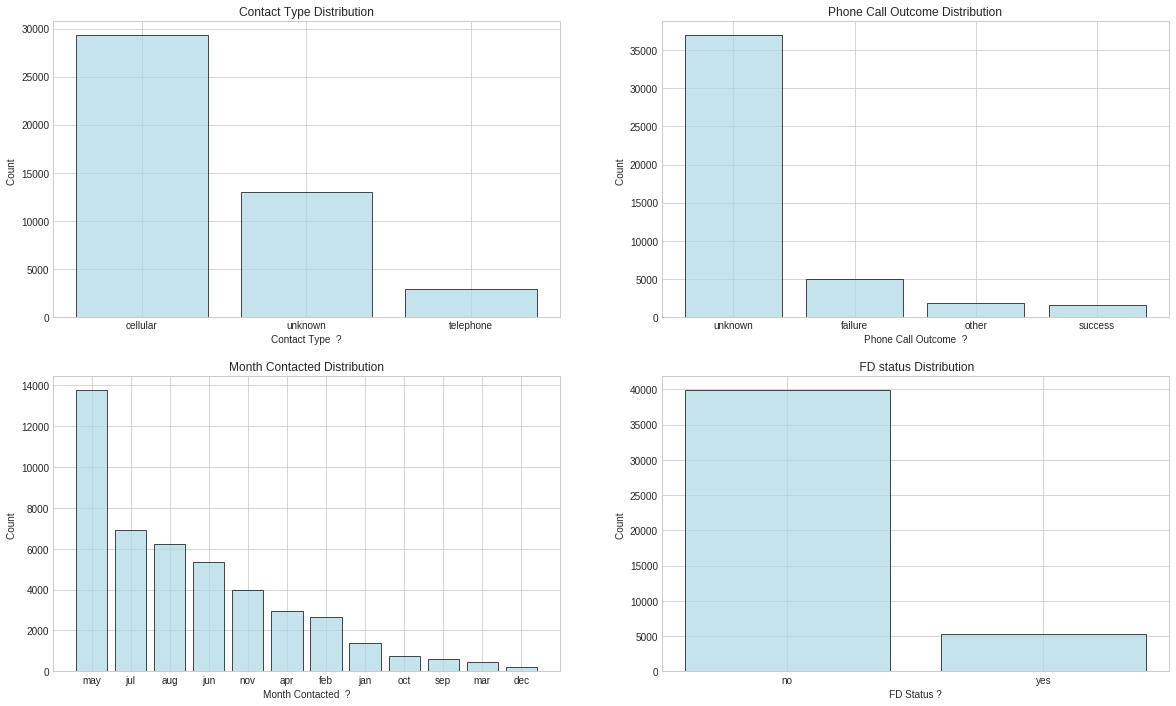

In [14]:

plt.figure(figsize=(20,25))

#Mode of communication with customers
x6 = newdf.contact.value_counts().index    #Values for x-axis
y6 = [newdf['contact'].value_counts()[o] for o in x6]   # Count of each class on y-axis

print("\nDistribution Of Mode Of Communication With Customers: ", newdf.contact.value_counts())

plt.subplot(4,2,1)
plt.bar(x6,y6, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Contact Type  ?')
plt.ylabel('Count ')
plt.title("Contact Type Distribution")

#communication result

x7 = newdf.poutcome.value_counts().index    #Values for x-axis
y7 = [newdf['poutcome'].value_counts()[p] for p in x7]   # Count of each class on y-axis

print("\nDistribution Of communication result: ", newdf.poutcome.value_counts())

plt.subplot(4,2,2)
plt.bar(x7,y7, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Phone Call Outcome  ?')
plt.ylabel('Count ')
plt.title("Phone Call Outcome Distribution")

#month when customer was last contacted

x8 = newdf.month.value_counts().index    #Values for x-axis
y8 = [newdf['month'].value_counts()[q] for q in x8]   # Count of each class on y-axis

print("\nDistribution Of monthly customer contact detail : ", newdf.month.value_counts())
plt.subplot(4,2,3)
plt.bar(x8,y8, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Month Contacted  ?')
plt.ylabel('Count ')
plt.title("Month Contacted Distribution")


#FD status Which is our target variable

x9 = newdf.Target.value_counts().index    #Values for x-axis
y9 = [newdf['Target'].value_counts()[r] for r in x9]   # Count of each class on y-axis

print("\nDistribution Of customer W.R.T FD : ", newdf.Target.value_counts())
plt.subplot(4,2,4)
plt.bar(x9,y9, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('FD Status ?')
plt.ylabel('Count ')
plt.title(" FD status Distribution")

plt.show()


Quick Observation On Above Category Plot : 
    
# Mode Of Communication With Customer: 

cellular     29285
unknown      13020
telephone     2906

    - Around 64 % mobile phone was used to contact potential customer. It will be interesting to see what was the call duration for the same, as it will impact the conversion rate to larger extent
    - Almost 28 % people mode of communication has ot been captured as needed with unknown categorization . These data don't seems to add any value as we don't know how to infer the outcome here. We need to resample this data to make sense and as this accounts for significant potion of the customer. 
    - Landline as expected has very low share as a mode of client communication. It gos to show that mobile has overpowered any other mode of people communication including the legendary landline. 
    
# Phone Call Outcome:

unknown    36959
failure     4901
other       1840
success     1511

    - It seems that large share of poutcome result which accounts for 80 % has not been captured meaningfully. This makes outcome as an attribute very insignificant to measure and gain any insight
    - The entire exercise to convert potentoal customer has not performed to the expecations as paltry 1511 person only responded positive. 
    - This attribute needs to be resampled or ignored 
    
#Month Wise Distribution , in a given year When Customer Wsa Last Contacted

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214

  - May month seems to have more frequency(13766) where banl connected to the potential customer for FD campaign. It can be also dure to previous year financial closing and to add new customers for FD instrument,
    to increase bank revenue.
    
  - Jun, July , August also have far share but not as mich compared to may month
  - Frequency of customer contact seems to be droppong as the month progreses after may in a given year. Specially dec month. 
  - March also has very frequency where bank contacted potential customer which looks as expected beacuse of financial year closing.   
 
 Target(FD) Variable :
    no :    39922
    yes:    5289
        
        - 88 % of the contacted customers seems to be not interested in FD which usually is the case specially for young customers due to low rate of interest. Also we have see the data distribution of various attributwe where many unkown records existed which are not at all adding to the analysis.
        So the  result is not surprising. Here data is imbalanced mostly classified in favour of NO. This situation may lead to high accuracy score and lots of model error for individual clasification models
        
        - Ensemble model where it combines many model seems to be the right solution to compensate the error rate and build string model. We will see this going forward
        
    

# 3.2-  BIVARIATE ANALYSIS:

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.   



   
We Will See how each attribute impacts each other using bivariate boxplot & Scatter Plot Ananlysis: 


   

# Let us see the count of customers who subscribed to FD based on their age 

We Will making using of count plot with Target var as hue.
    

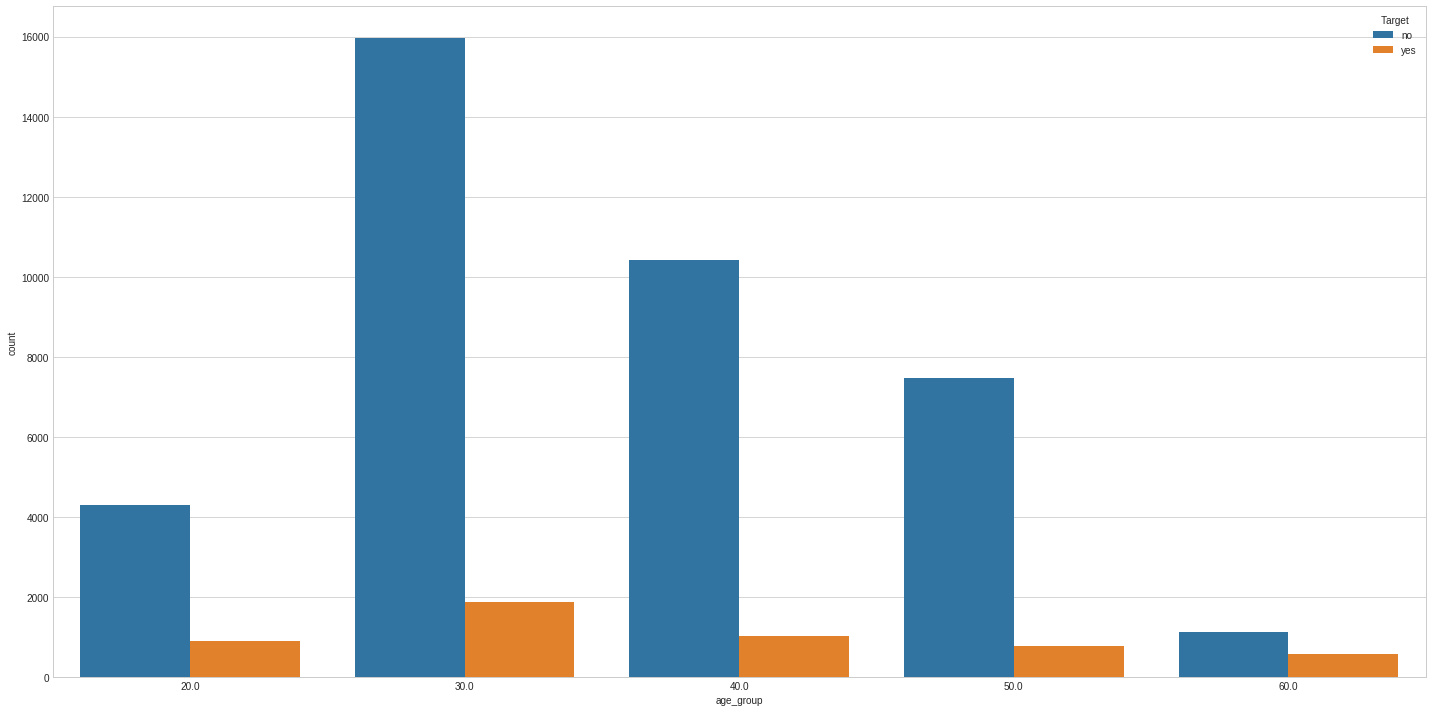

In [15]:
# 1. FD Subscribers Age Distribution: 

#But First Let's Craete Age Grouping: 

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)


plt.figure(figsize=(20,10))
sns.countplot(newdf2['age_group'], hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
      - FD subscription rate is higher among young people between the age of 30-40 , but one should also consider the fact that distribution of sampled data is imbalanced in terms of no & yes. Given this fact people with 60 and beyond also has fared well in term s of FD subscription
      

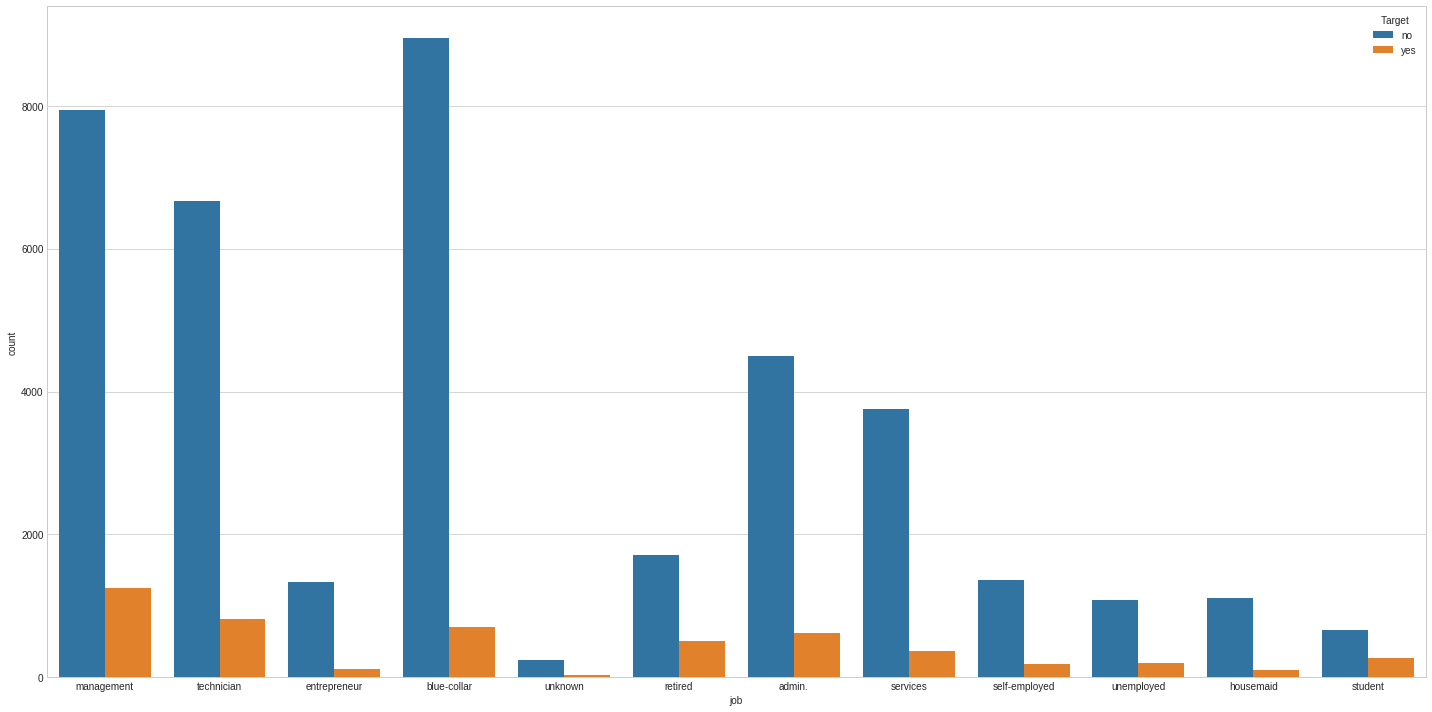

In [16]:
# Let us see the count of customers who subscribed to FD based on their job profile


plt.figure(figsize=(20,10))
sns.countplot(newdf2.job, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
      - Management professional seems to be more likely to avail FD option here. 
      - Technician also seems to faring well along with blue collar professionals.   

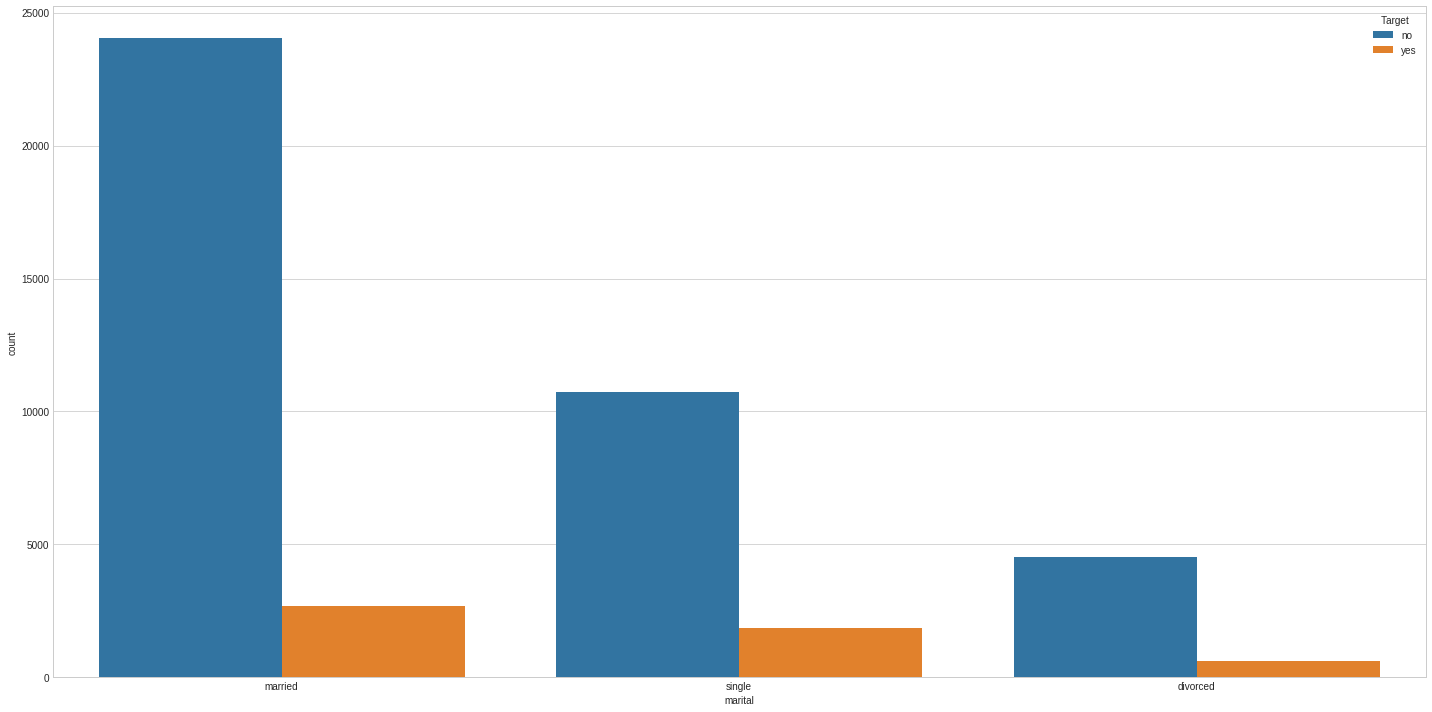

In [17]:
# Let us see the count of customers who subscribed to FD based on their Marital Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.marital, hue = "Target", data=newdf2)
plt.tight_layout()

Marital Status Impacts On FD Subscription :

 - Married customers  has higher fd subscription, divorced people are broken and are less likely to avail FD 

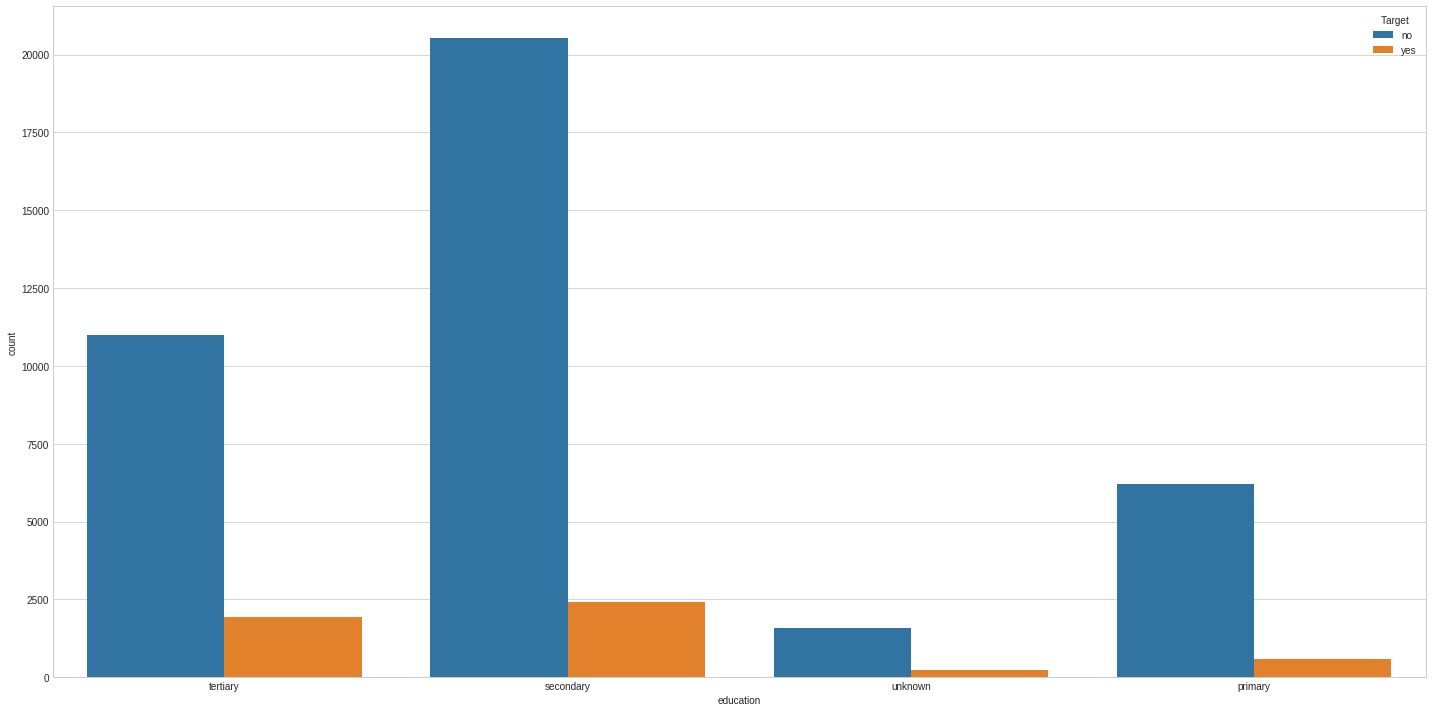

In [18]:
# Let us see the count of customers who subscribed to FD based on their education level


plt.figure(figsize=(20,10))
sns.countplot(newdf2.education, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 

   - Higher the education level higher is the rate of Fd subscription
   

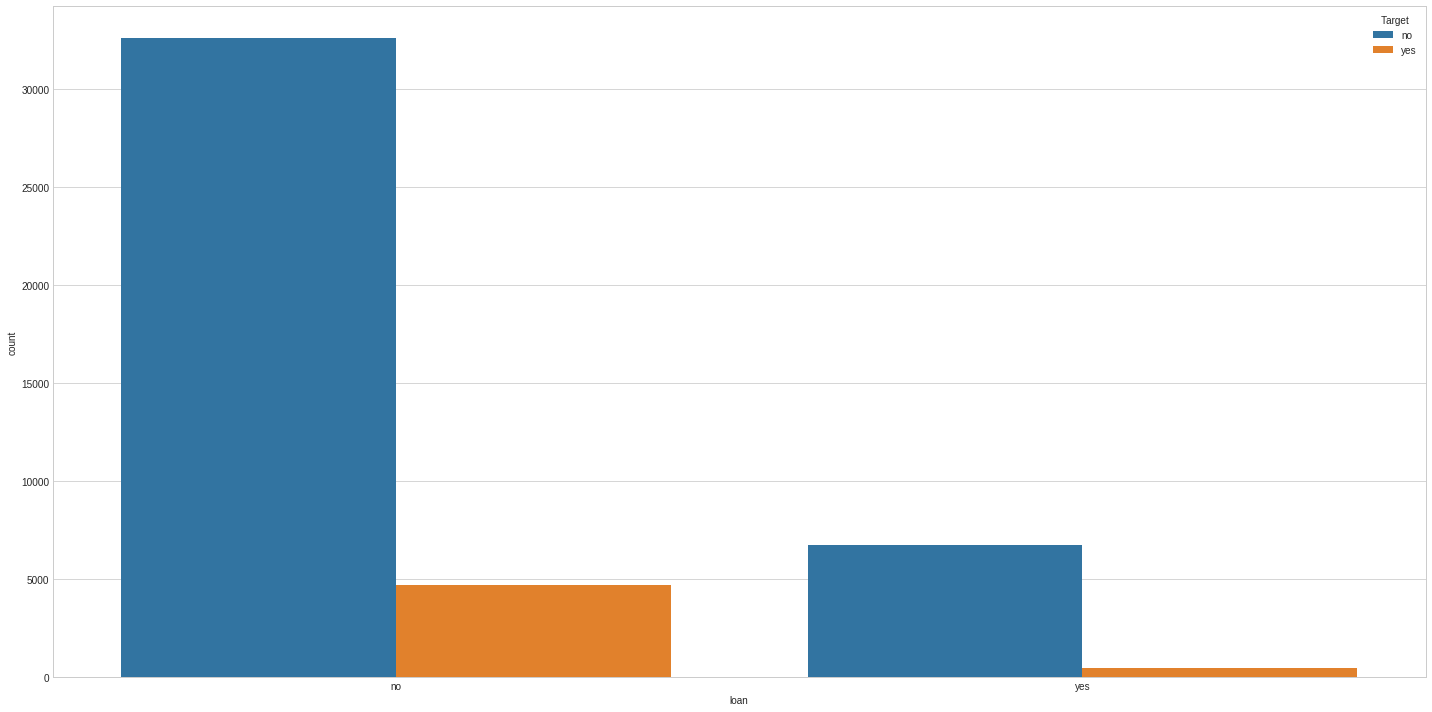

In [19]:
# Let us see the count of customers who subscribed to FD based on their Personal Loan Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.loan, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights:
   - Customer with no Personal loan has higher FD subscription Rate. 

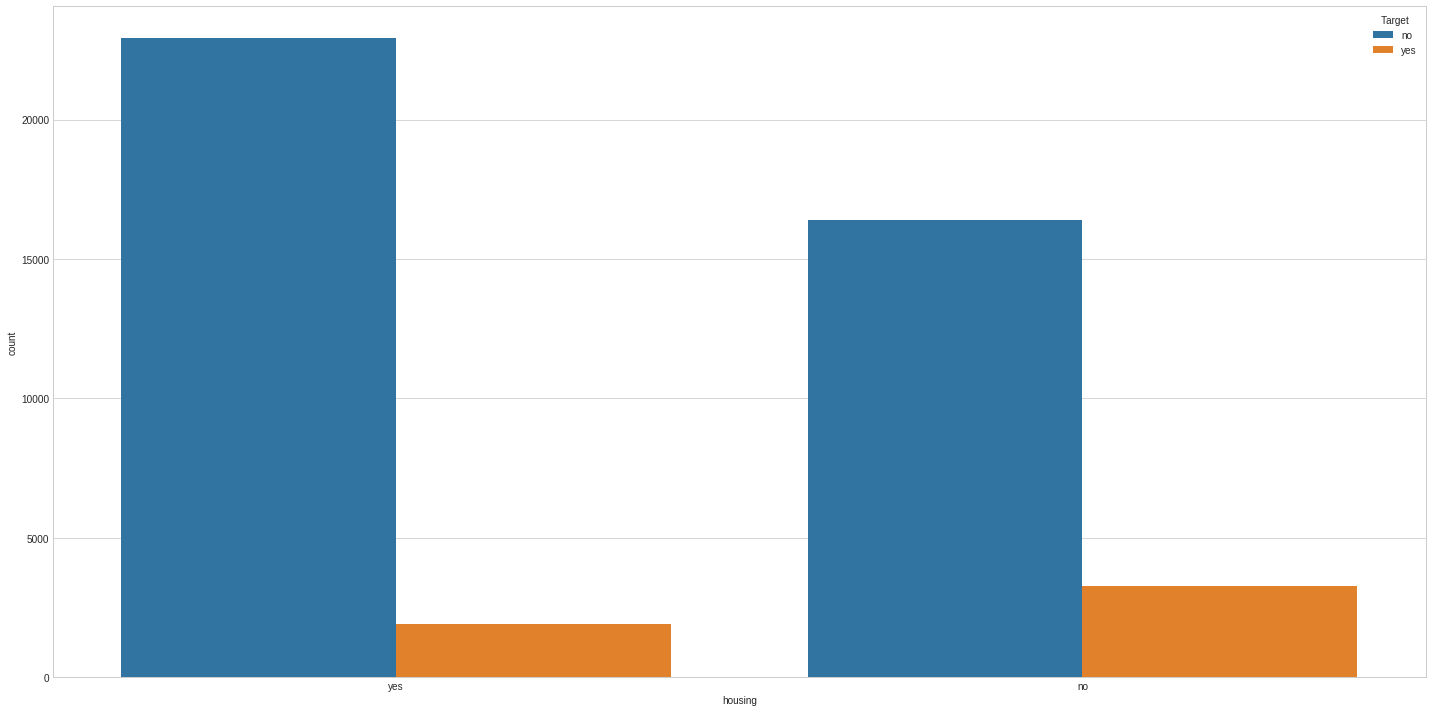

In [20]:
# Let us see the count of customers who subscribed to FD based on their Housing Loan Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.housing, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
   - Person who has past housing loan seems to avoid FD option as compared to those who doesn,t have Housinh loan

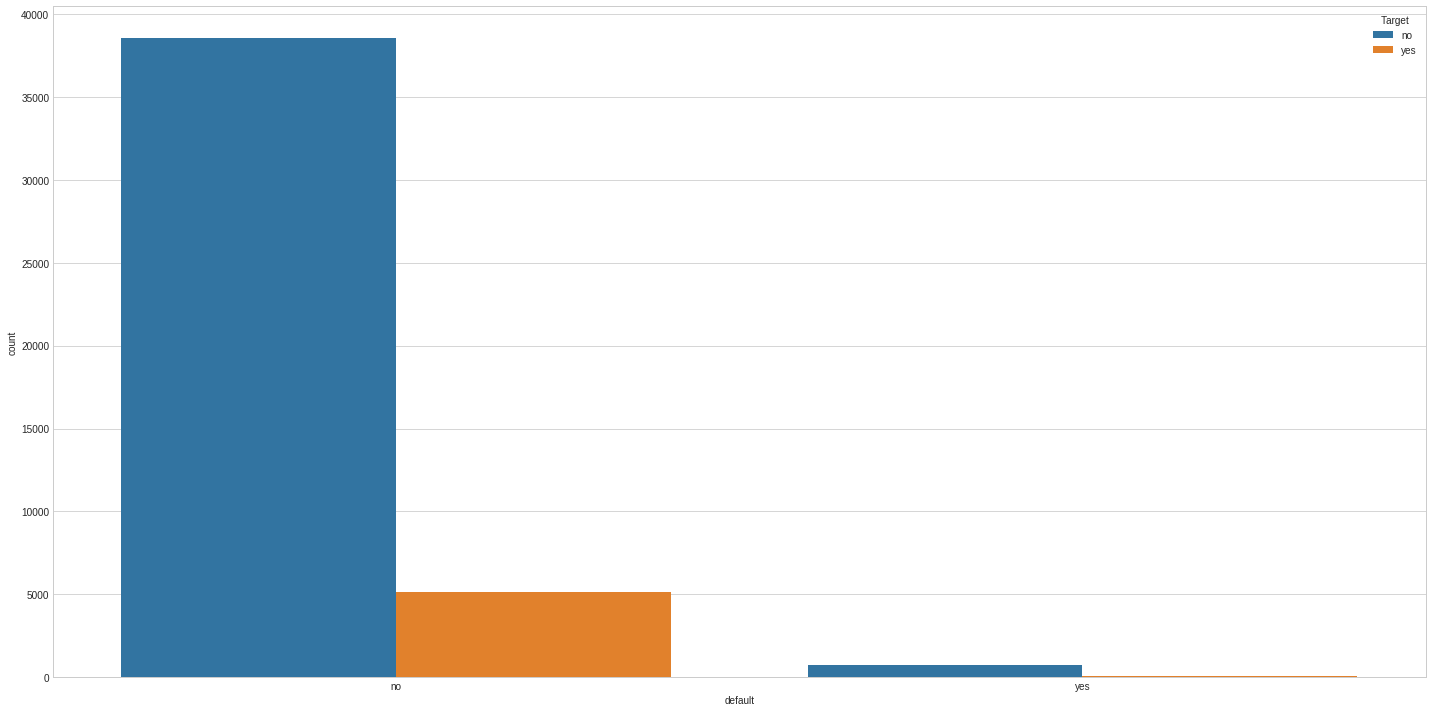

In [21]:
# Let us see the count of customers who subscribed to FD based on their Credit Default  Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.default, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
     - As expected customer with no default history are more liley to opt for FD

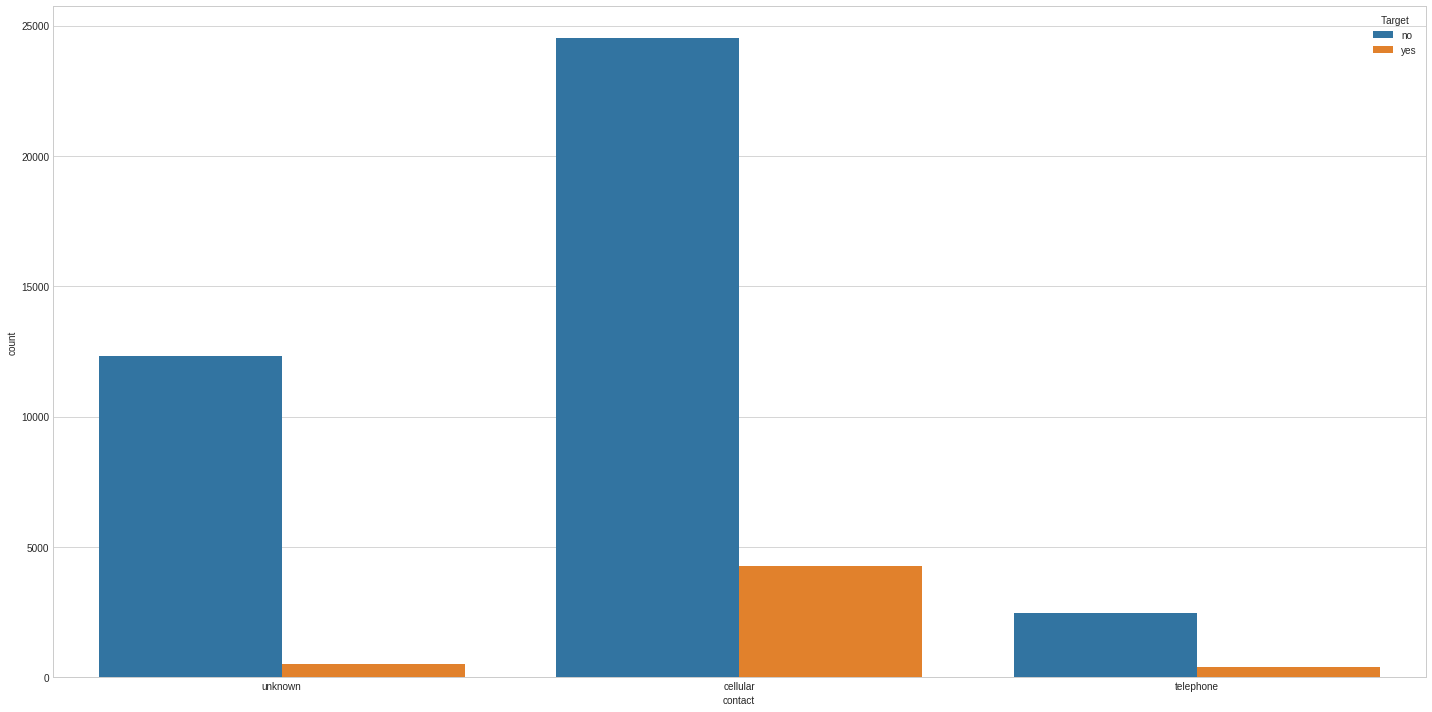

In [22]:
# Let us see the count of customers who subscribed to FD based on their mode of client communication


plt.figure(figsize=(20,10))
sns.countplot(newdf2.contact, hue = "Target", data=newdf2)
plt.tight_layout()



Quick Insights: 
    
    - As expected cellualr as a mode of communication is leading the count and also the fd subscription rate

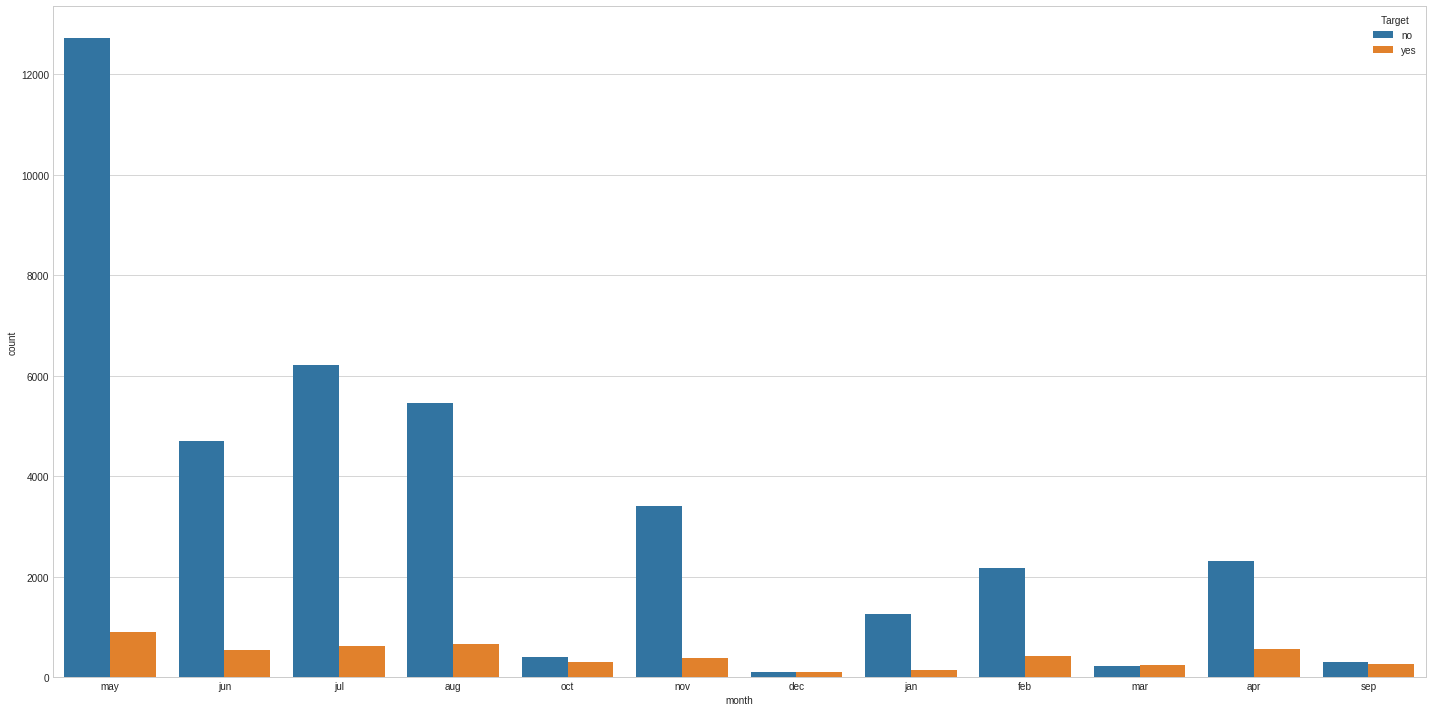

In [23]:
# Let us see the count of customers who subscribed to FD based on their last month of contact


plt.figure(figsize=(20,10))
sns.countplot(newdf2.month, hue = "Target", data=newdf2)
plt.tight_layout()


Quick Insights: 
    - May month seems to be best time to conact customer for increasing the rate of FD subscription
    - April, jun, july, aug also seems to be farring well but march, dec and jan doesn't look idel time to campaign. 

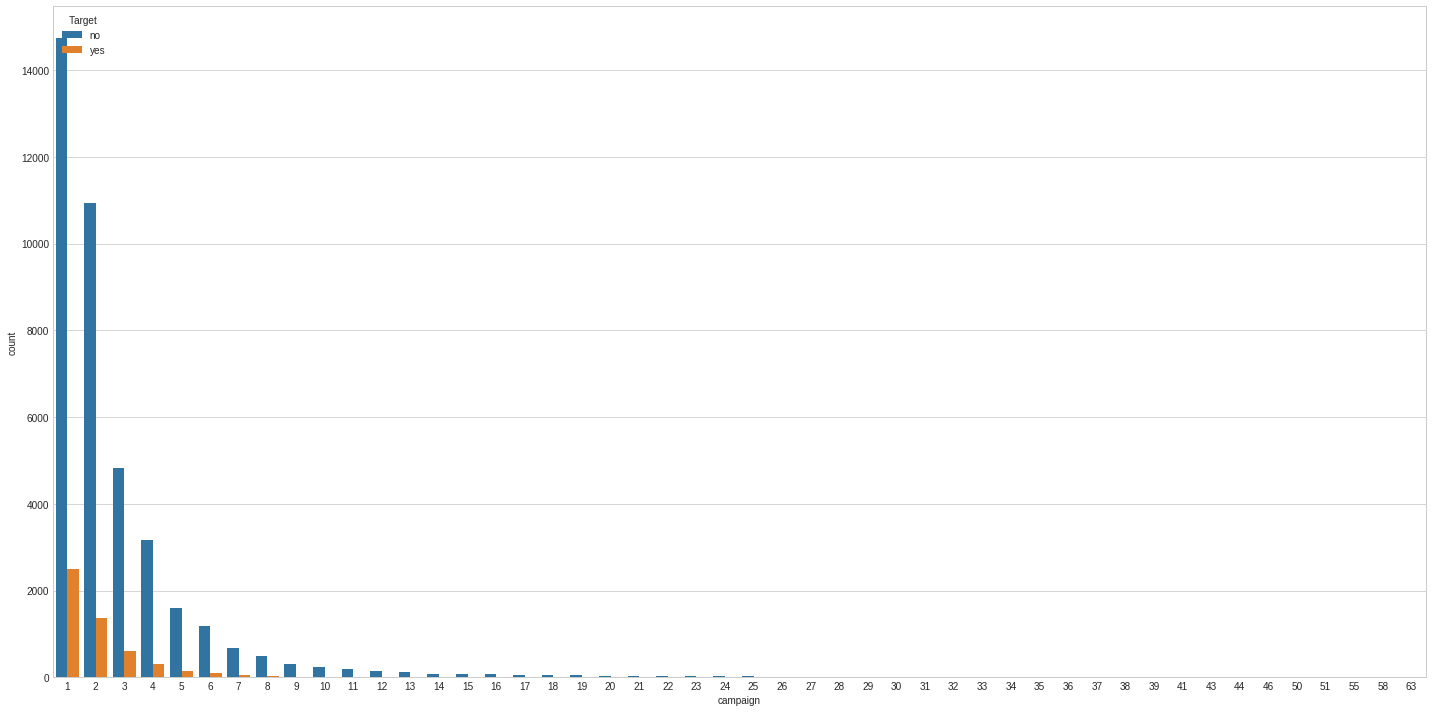

In [24]:
# Let us see the count of customers who subscribed to FD based on frequency of customr contact during the campaign


plt.figure(figsize=(20,10))
sns.countplot(newdf2.campaign, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insigts: 
    - it is clearly visible that if the customer is contacted not more than 5 times they are more likely to opt for FD option.

# AGE & BALANCE REALTIONSHIP: 

Lets see how the bank balance and age are related . We removed some outlier in our balance attribute let;s use that data to see the result 
   

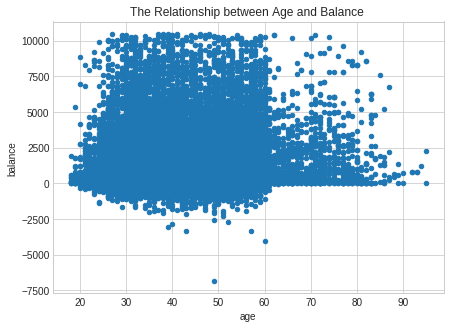

In [25]:

scatter_age_balance = newdf2.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()


# Quick Insights: 

There seems to no linear relationship between age & balance and Based on this scatter plot, there is no clear relationship between client’s age and balance level.
Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

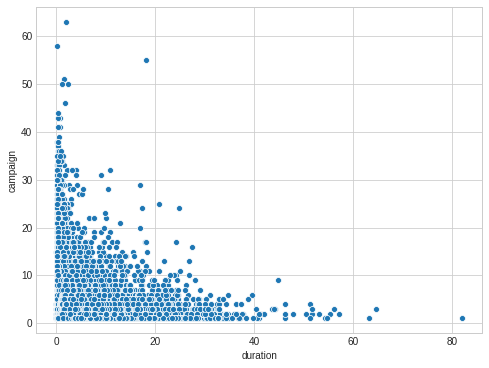

In [26]:

#2. Duration &  Campaign: 
plt.figure(figsize=(8,6))
sns.scatterplot(newdf2.duration, newdf2.campaign, palette= ['pink','lightblue'] )
plt.show()

Obseravtion:
    - we can see some kind trend here, when frequency of contacting the same client increases, call duration which happens with the client decreases, it's a kind of nrgative correlation.So it is advisable that the less is the frequency longer is the call duration which may result in better conversion rate. 
    - If the contact frequency is between 5-10 call duration is more and it may result in better outcome as far as FD is concerned


# EDUCATION & BANK BALANCE
   Let's see how  education impacts the bank balance of the customer
  

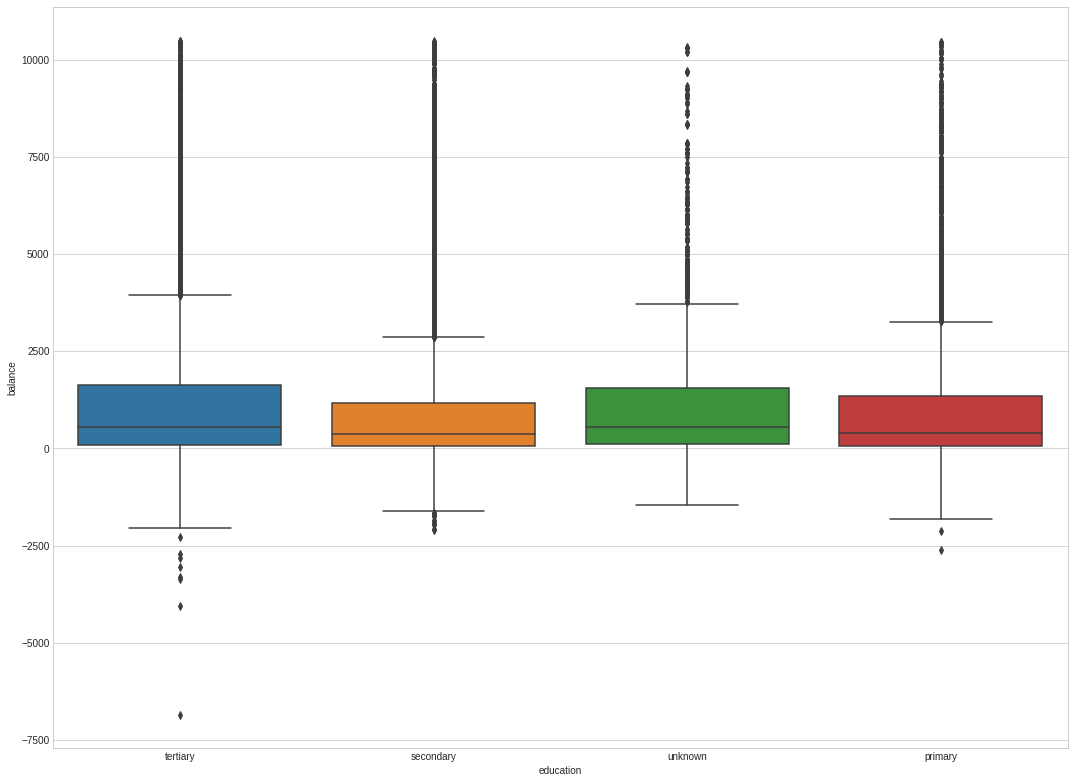

In [27]:

#imapct of job type, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax2= fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], data=newdf2, ax =ax1)
#ax2 = sns.boxplot(newdf2['age'], newdf2['balance'], data=newdf2, ax =ax2)



In [28]:
#Before We measure the impacts of predcitor variable on our target let's have quick aggregation view using groupby
print(newdf2.groupby('Target').mean())
print(newdf2.groupby('Target').median())


              age      balance        day  duration  campaign      pdays  \
Target                                                                     
no      40.787419  1038.462644  15.891954  3.685797  2.848058  36.502697   
yes     41.604489  1434.955495  15.131385  8.978824  2.137771  68.698529   

        previous  age_group  
Target                       
no      0.502010  36.225253  
yes     1.169118  36.559598  
        age  balance  day  duration  campaign  pdays  previous  age_group
Target                                                                   
no       39      402   16      2.73         2     -1         0       30.0
yes      38      698   15      7.15         2     -1         0       30.0


Quick Insights: 

  - Avearge age of person who subscribed the FD is arond 41
  - Average bank balance lying with the customer with who subscribed to FD is 1435 Euro
  - It is observed the average call duration it took to convert cutomer to buy FD is around 9 minutes. Very less duration call seems to fail in converting the client to buy FD's
  

# How Age Of The Customers Is Related To Fd Subscription: 

Target            no        yes
age_group                      
20.0       82.554577  17.445423
30.0       89.480177  10.519823
40.0       90.961438   9.038562
50.0       90.647395   9.352605
60.0       66.491841  33.508159


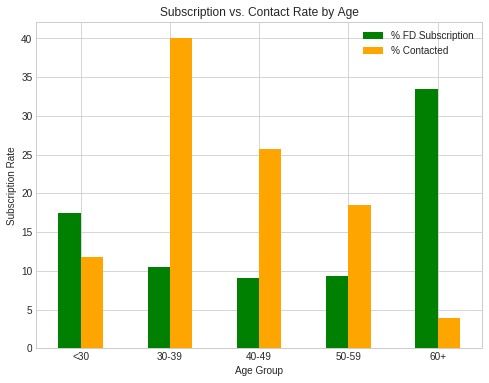

In [29]:
#Age & Target Variable
#Let's see of how age impacts the people's decision to take fd. 

#But First Let's Craete Age Grouping: 

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 
print(count_age_response_pct)

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% FD Subscription','% Contacted']].plot(kind = 'bar', figsize=(8,6), color = ('green','orange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()


#ax = sns.boxplot(dataframe['Target'], newdf2['age_group'], data=newdf2)
    
    
    

# Observation: 

      - Orange Bar plot indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.
The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.
However, red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.
     
    - Some people beyoind 70 age has also been targeted, specially person between 80-90 ysr of age, which i feel is not a great right move cosidering the 

 # FD subscription rate based on contacted customers balance level
 

Target                  no        yes
balance_group                        
average balance  84.668250  15.331750
high balance     84.769158  15.230842
low balance      89.103004  10.896996
no balance       93.103448   6.896552


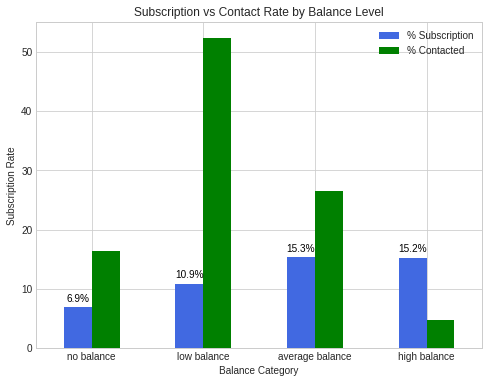

In [30]:

#Let's Seggregate The Balance  & Perform Transaformation To Have Better Insights

lst = [newdf2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
    
count_balance_response_pct = pd.crosstab(newdf2['Target'],newdf2['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(newdf2['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','green'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1,  label+'%',   ha = 'center', color = 'black')

print(count_balance_response_pct)

#ax = sns.boxplot(newdf2['Target'], newdf2['balance'], data=newdf2)

Quick Insights For FD subscription rate against balance level:


To identify the trend more clearly, we have categorized customers into four groups based on their levels of balance:

No Balance: clients with a negative balance.
Low Balance: clients with a balance between 0 and 1000 euros
Average Balance: clients with a balance between 1000 and 5000 euros.
High Balance: clients with a balance greater than 5000 euros.

   - Our Box Plot shows a positive correlation between clients’ balance levels and fd subscription rate. Clients with negative balances only returned a fd subscription rate of 6.9% while clients with average or high balances had significantly higher FD subscription rates, nearing to  15%.
   
   - We have seen above that more than 50% of customers contacted had the low balance level.So bank has to taje care in the future to target cusytomers with high bank balance level. People with negative balance are less likely to subscribe to FD. 

# FD subscription rate by job¶

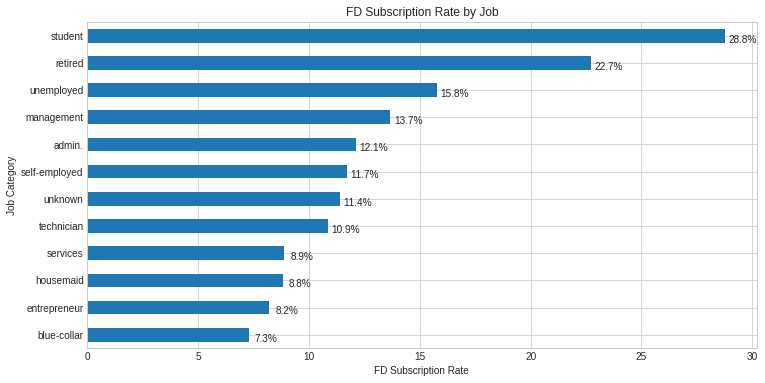

In [31]:
#First Let's Transform The Data, So that we can plot them meaningfully

count_job_target_pct = pd.crosstab(newdf2['Target'],newdf2['job']).apply(lambda x: x/x.sum() * 100)
count_job_target_pct = count_job_target_pct.transpose()

plot_job = count_job_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Job')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches, count_job_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insghts: For FD subscription rate by job¶¶

  - Here it is clearly laid down in our bar chart that students and retired clients account for more than 50% of FD subscription, which is consistent with the previous finding of higher FD subscription rates among the younger and older.

# FD Subscription Rate Based on Marital Status : 

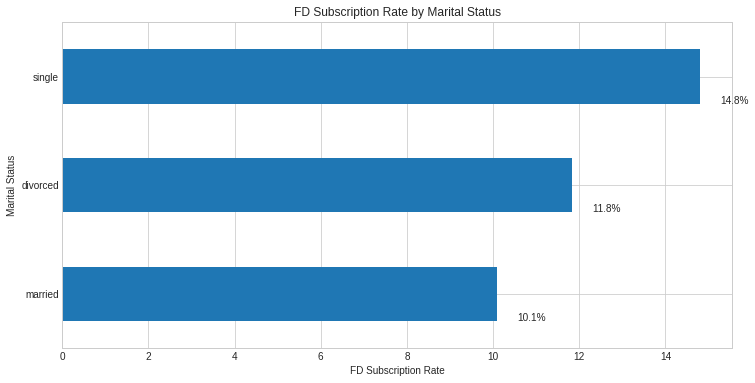

In [32]:
count_marital_target_pct = pd.crosstab(newdf2['Target'],newdf2['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_target_pct = count_marital_target_pct.transpose()

plot_marital = count_marital_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Marital Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Marital Status')

# Label each bar
for rec, label in zip(plot_marital.patches, count_marital_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_marital.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insights : Marial Stataus Impact On FD Subscription: 

   - As we saw above young that young people are more subsciber of FD, here also we can say that young unmarried person are leading the way with 15 % FD subscription rate,out of total subscribed fd customer. 
   - Divorce seems to unexpectedly ranking higher thab married customer.
   - Married one's are less oriented towards FD option.

# FD Subscription Rate Based on Education Level: 

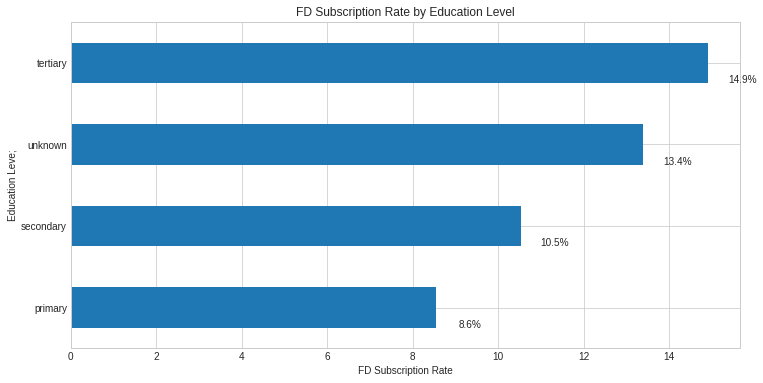

In [33]:
count_education_target_pct = pd.crosstab(newdf2['Target'],newdf2['education']).apply(lambda x: x/x.sum() * 100)
count_education_target_pct= count_education_target_pct.transpose()

plot_education = count_education_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Education Level')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Education Leve;')

# Label each bar
for rec, label in zip(plot_education.patches, count_education_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insights: people education level distribution who opted for FD
   - People with higher level of education has higher subscription rate . Here 15 % people with higher education level opted for FD out of all FD subsciber. 14 % user who education level is not capture as wanted acount for good 13 % out of total FD subscribers
    

# FD Subscription Rate Based On Personal Loan Status Of The Customers

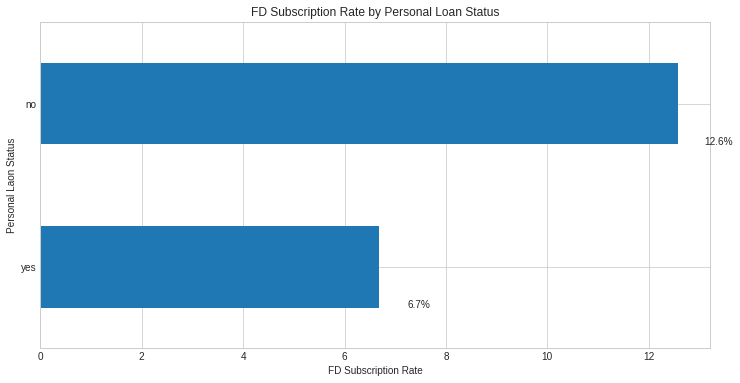

In [34]:
count_loan_target_pct = pd.crosstab(newdf2['Target'],newdf2['loan']).apply(lambda x: x/x.sum() * 100)
count_loan_target_pct= count_loan_target_pct.transpose()

plot_loan = count_loan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Personal Loan Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Personal Laon Status')

# Label each bar
for rec, label in zip(plot_loan.patches, count_loan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick insights on FD Subscription Rate Based On Personal Loan Status Of The Customers:
    
     - Person with personal loan on their head seems to less interested in fd , as you can see only 6.7 % of them availed FD option
     - As expected people with no loan on their head a more likely to avail FD options. As it can be seen here that around 12.6 % customer with no pl opted for FD 
    
        

# Impact Of Cutsomers Credit Default On FD Subscription: 

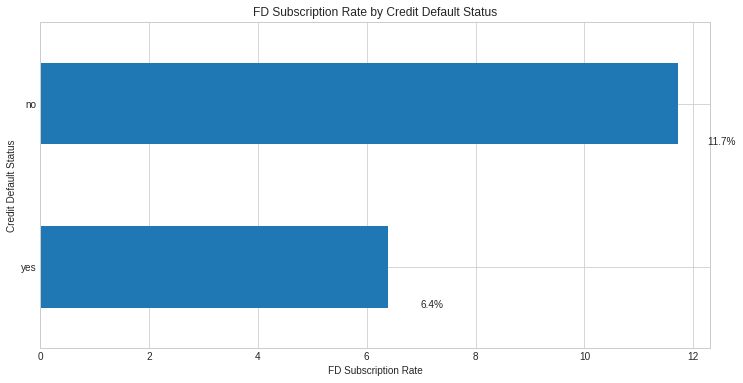

In [35]:
count_creditdefault_target_pct = pd.crosstab(newdf2['Target'],newdf2['default']).apply(lambda x: x/x.sum() * 100)
count_creditdefault_target_pct= count_creditdefault_target_pct.transpose()

plot_credit_default = count_creditdefault_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Credit Default Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Credit Default Status')

# Label each bar
for rec, label in zip(plot_credit_default.patches, count_creditdefault_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_credit_default.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insights On How Credit Default Status Is Related To FD Subscription: 

    - We can see that person with no default credit stastus has higher FD rate subscription which is as per expectations. They account for around 12 %.
    - Person with credit default history accounts for 6.4 % FD subscription. 
    

# Let's See How People With Housing loan responded to FD subscription camapign

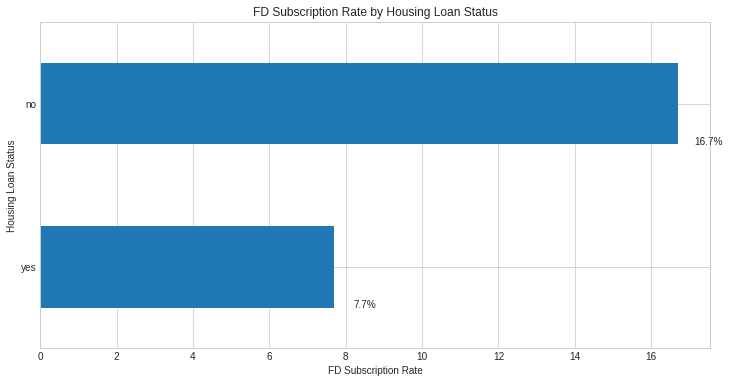

In [36]:
count_housingloan_target_pct = pd.crosstab(dataframe['Target'],dataframe['housing']).apply(lambda x: x/x.sum() * 100)
count_housingloan_target_pct= count_housingloan_target_pct.transpose()

plot_housing_loan = count_housingloan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Housing Loan Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Housing Loan Status')

# Label each bar
for rec, label in zip(plot_housing_loan.patches, count_housingloan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_housing_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

    
#yhdf = newdf2[newdf2['housing']== "yes"]



Quick Insights: 
    
    - customers with houing loan on their head are less likley to avail FD, here only 8 % of the customers with already having  housing loan availed fd option. This is as expected
    - around 17 % of the cutomers with no housing loan opted for FD instrument. 

In [37]:
#Let's See How Mode Of Communication Impacts FD 

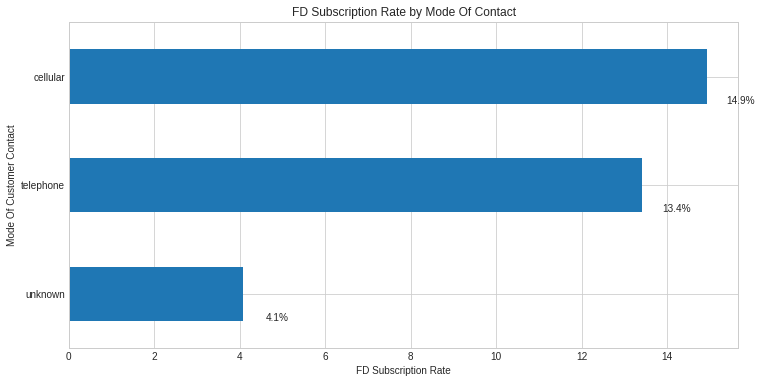

In [38]:
count_modeofcomm_target_pct = pd.crosstab(dataframe['Target'],dataframe['contact']).apply(lambda x: x/x.sum() * 100)
count_modeofcomm_target_pct= count_modeofcomm_target_pct.transpose()

plot_comm_mode = count_modeofcomm_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Mode Of Contact')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Mode Of Customer Contact')

# Label each bar
for rec, label in zip(plot_comm_mode.patches, count_modeofcomm_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_comm_mode.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

    
#yhdf = newdf2[newdf2['housing']== "yes"]


Quick Insight : 
      - Out of total customer who opted for fd , 15 % of them were converted usng cell phone as mode of contact. which seems to normal and expected
      - Telephine seems to be quite close to mobile and accounts for 13.4 % of FD conversion.   

# Impact Of Call Duration On FD Conversion: 

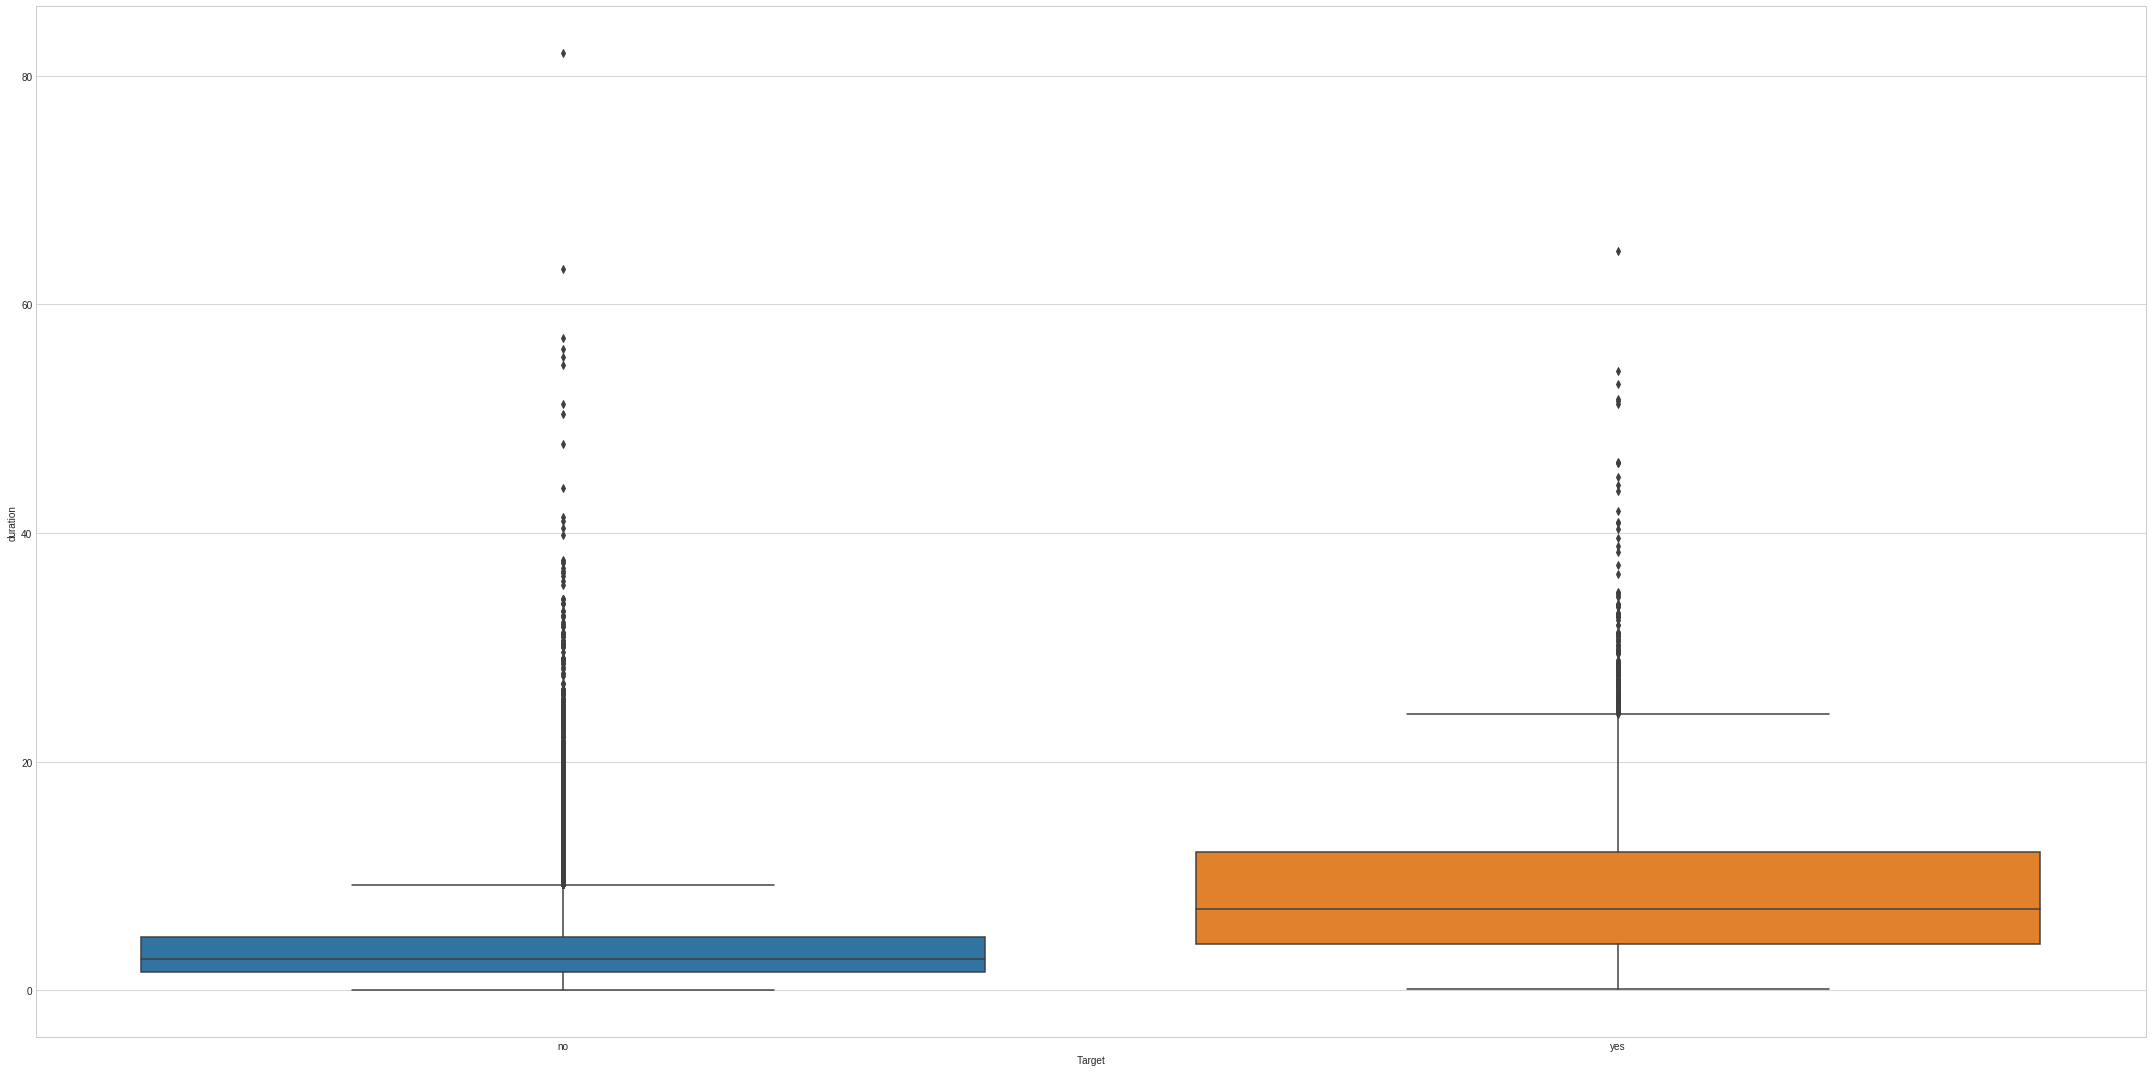

In [39]:


plt.figure(figsize=(30,15))
ax = sns.boxplot(newdf2['Target'], newdf2['duration'], data=dataframe)

plt.tight_layout()

Quick Insight: 
    
    - If the call duration was less than 3-5 minutes customers were less likely to subscribe to FD option
    - But If the call duration lasted between 5-10 minutes , customers were more likely to take FD
     

# FD subscription rate based on last contact month of year

Target         no        yes
month                       
apr     80.320600  19.679400
aug     88.986714  11.013286
dec     53.271028  46.728972
feb     83.352208  16.647792
jan     89.878831  10.121169
jul     90.906454   9.093546
jun     89.777195  10.222805
mar     48.008386  51.991614
may     93.280546   6.719454
nov     89.848866  10.151134
oct     56.233062  43.766938
sep     53.540587  46.459413


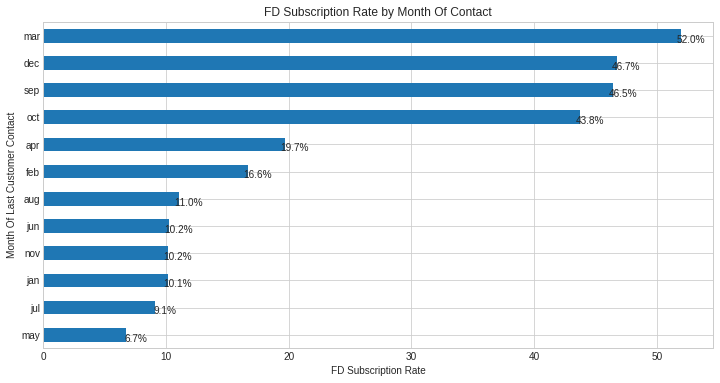

In [40]:
count_monthofcontact_target_pct = pd.crosstab(dataframe['Target'],dataframe['month']).apply(lambda x: x/x.sum() * 100)
count_monthofcontact_target_pct= count_monthofcontact_target_pct.transpose()
print(count_monthofcontact_target_pct)

plot_mnth_contact = count_monthofcontact_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Month Of Contact')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Month Of Last Customer Contact')

# Label each bar
for rec, label in zip(plot_mnth_contact.patches, count_monthofcontact_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_mnth_contact.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insight On Impact of customer contact monthwise on fd subscription rate: 
 
 -The highest fd subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.Clearly, this gives some insights to the bank when to plan their campaign. Having said that they should also count external factor related to weather etc while planning their marketing camapign.


# How Marital Status Impacts Balance Of The Customer

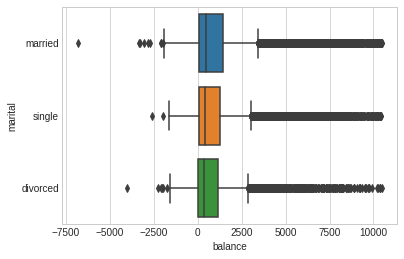

In [41]:
ax = sns.boxplot(newdf2['balance'], newdf2['marital'], data=newdf2)

Quick Insights: 
     - As seen form the box plot above married person have better financial status as compared to single & divorced person. 
     -  Divorced Person seems to borke, which is expected due to financail pressure one has to bear.

# Education Impact On  Cutsomer Bank Balance:

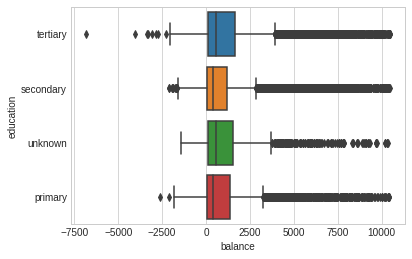

In [42]:
ax = sns.boxplot(newdf2['balance'], newdf2['education'], data=newdf2)

Quick Insight: 
       - The level of education also has a significant impact on the amount of balance a prospect has. As shown above the person with higher education has higher bank balance as compared to promary level educated person.
       - Unknown category whose info is not clear seems to be having more bank balance than primary, this needs to be taken care by bank executive to find the actual education level.
       - There is one interesting observation against people with secondary level eduaction , they seems to have low balance which can be due to the expense they need to plan for higher eduaction. 
       - Also person with higher education level also have more no. of person with negative bank balance with some outlier. 

# Impact Of Previous Personal Loan On Bank Balance

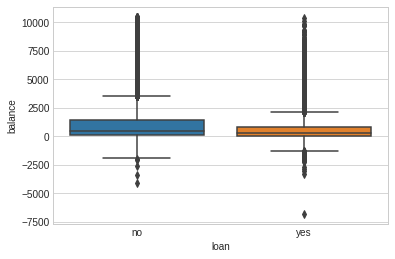

In [43]:
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], data=newdf2)

Insights: 
      - It is clear that person with previous PL seems to be struggling with bank balance as expected
        

# Impact Of Housing Loan On  Customer Bank Balance

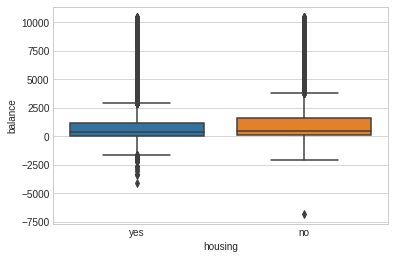

In [44]:
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], data=newdf2)

Quick Insights: 
   - it is clear that person with previous housing loan has low bank balance 

# Let's see default status of the customer impacts the bank balance

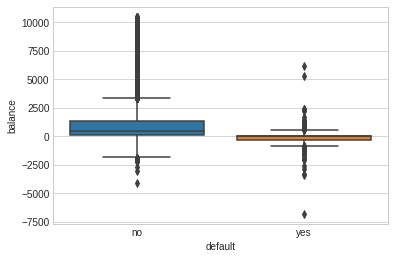

In [45]:
ax = sns.boxplot(newdf2['default'], newdf2['balance'], data=newdf2)

Quick Insight: 
   - it is visible that person with default credit history has borken bank balance. 

# 3.3 Multivariate Analysis: 

# Let's Visualize the relationship between 'duration' & 'campaign': with Target(FD) result

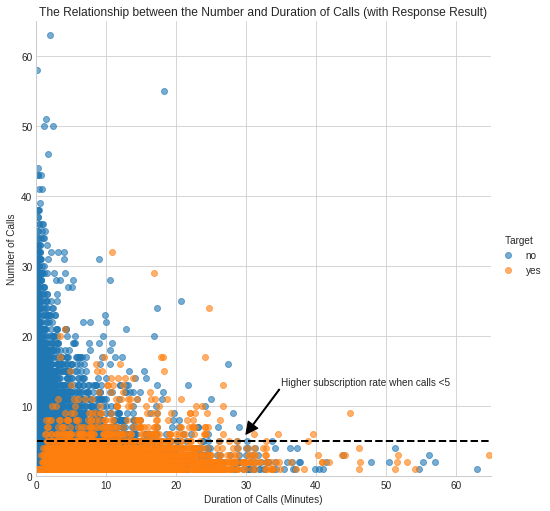

In [46]:
campaign_call_duration = sns.lmplot(x='duration', y='campaign',data = newdf2,hue = 'Target',fit_reg = False, scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

Quick Insights: 
    
    - Here we can see that customer who said no, were contacted more than 10 times and had a small call duration . while customers who subscribed to FD were approached fewer times(less than 10 times ) 
    and had longer call duration. It is visible that after five campaign calls, clients are more likely to reject the term deposit unless the call duration is high.
    
    - Most of the customers who subscribed to fd were approached by less than 10 times.

So it is advisable that the bank should avoid calling a client for more than five times, as it seems that customers don't like that move. 

# Let's understand how  the subscription rate get's affected by customer's credit default status & bank balance¶

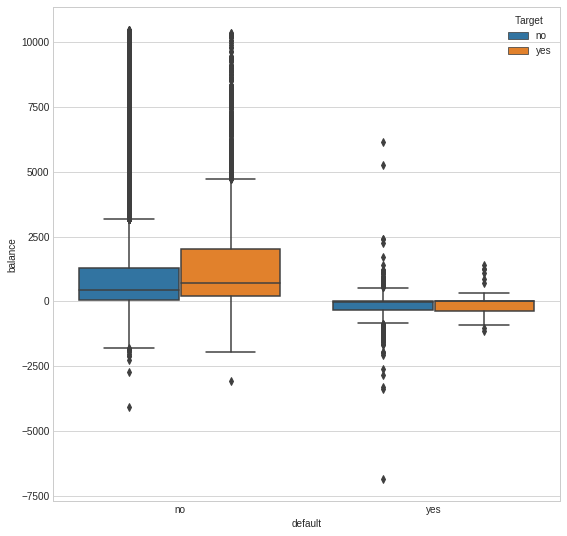

In [47]:
# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

# plt.style.use('dark_background')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['default'], newdf2['balance'], hue = "Target", data=newdf2)


#quick insights:
  - There is clear insight that customers who has not defaulted, have higher average bank balance and more likely to subscribe to FD option
  - The customer with dafult stataus have negative to very low bank balance and are very less likely to avail FD.
 

# Let's understand how  the subscription rate get's affected by customer's education level & bank balance¶

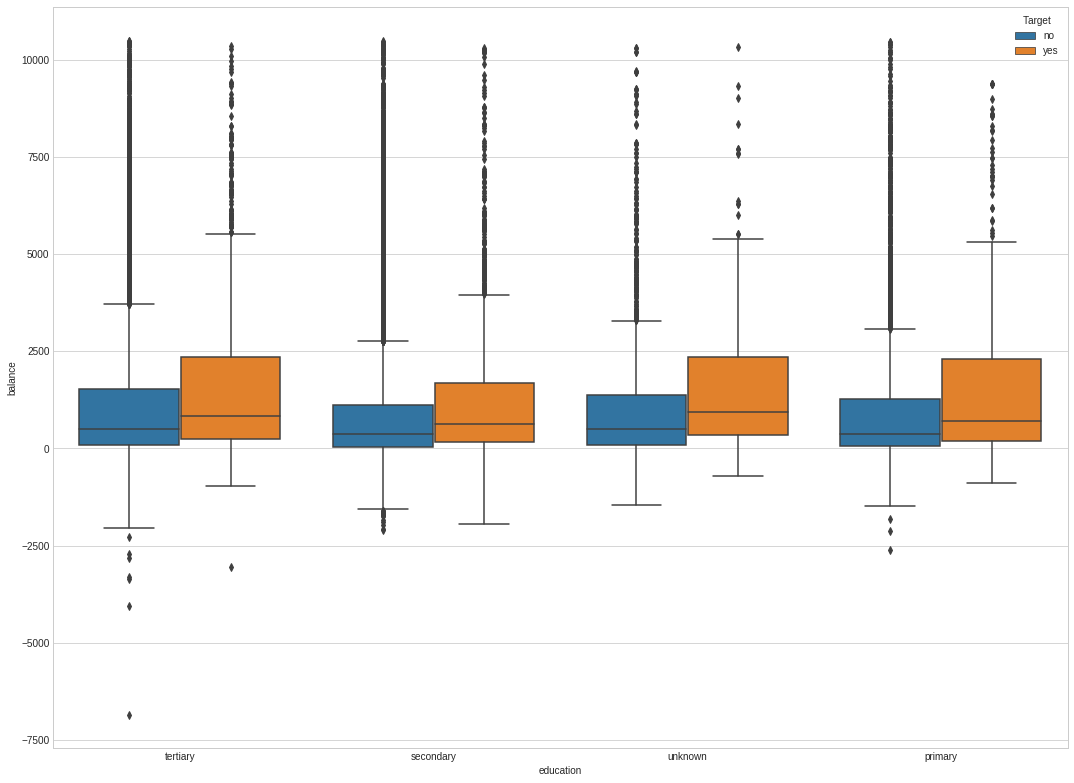

In [48]:
#imapct of job type, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], hue = "Target", data=newdf2)


Quick Insights: 
   - Customers with higher education tends to have higher bank balance and more fd subscription rate, they also have higher number of customers who refused fd option.
   - customers with unknown education level aslo seems to have higher fd subscription and ranks second to tertiary. 
   - Customers with primary level eduaction also tends to have high fd subscription rate clos to tertiary
   - So there seems to be no clear trend here i terms of  how education impacts fd subscription decision.




# Let's understand how  the subscription rate get's affected by customer's Job Type & bank balance¶

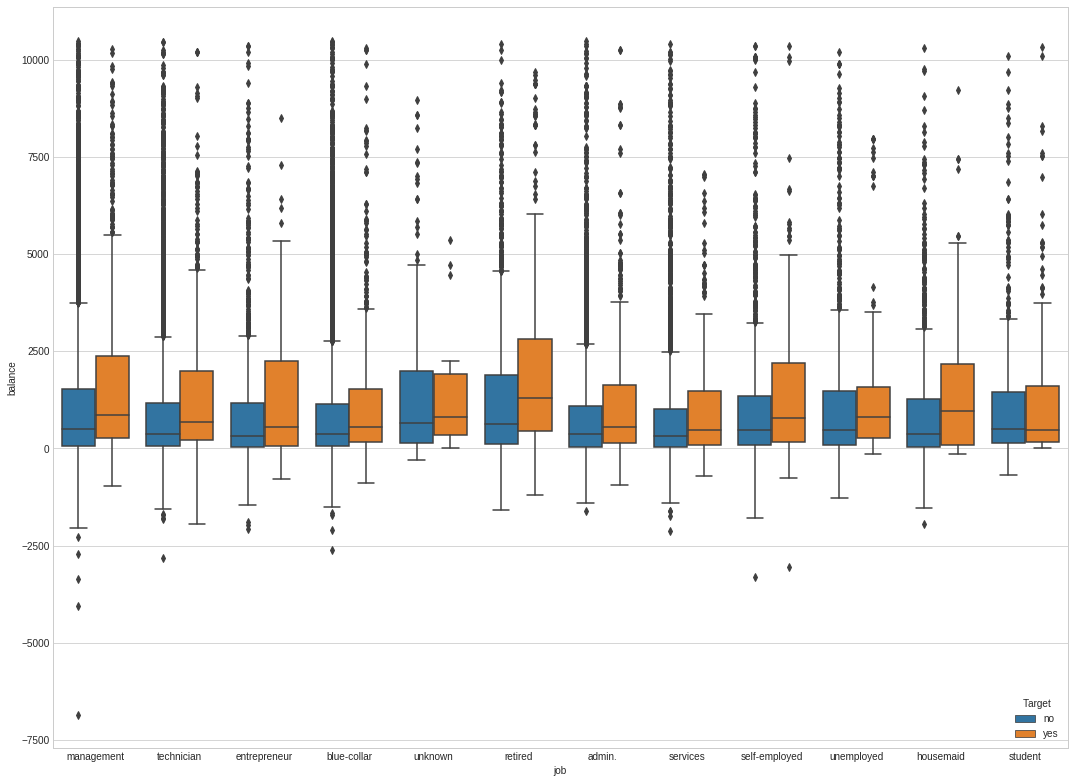

In [49]:
#imapct of education, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['job'], newdf2['balance'], hue = "Target", data=newdf2)



Quick Insights: 
   
     - Customers who are retired seems to have more bank balance and more FD subscription rate.
     -  Management professional seems to have less negative bank balance as compared to retired and also have second highest bank balance and fd  subscription rate
     - student doesn't seems to have negative bank balance ans so is the case with housemaid who seems to have very little negatuve bank balance . 

# Let's understand how  the subscription rate get's affected by customer's marital status & bank balance¶

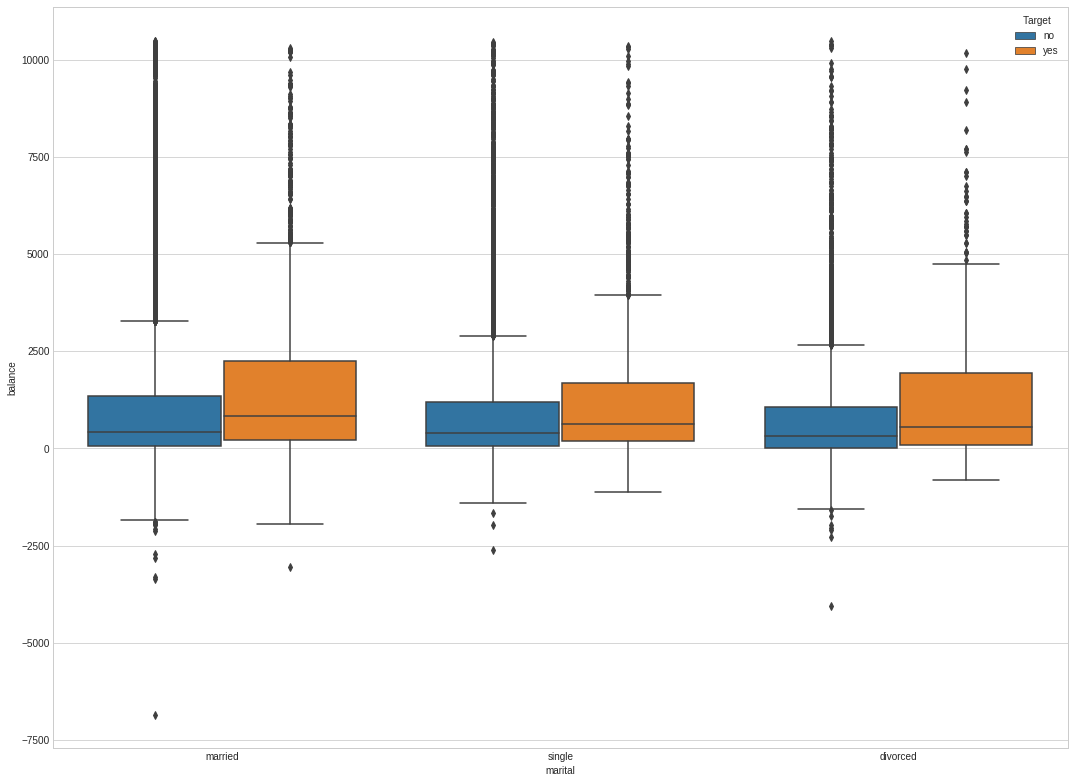

In [50]:
#imapct of marital status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['marital'], newdf2['balance'], hue = "Target", data=newdf2)

Insights: 
  - married customers seems to have higher bank balance and so are more likely to subscriobe to FD. 

# Let's understand how  the subscription rate get's affected by customer's Personal loan status & bank balance¶

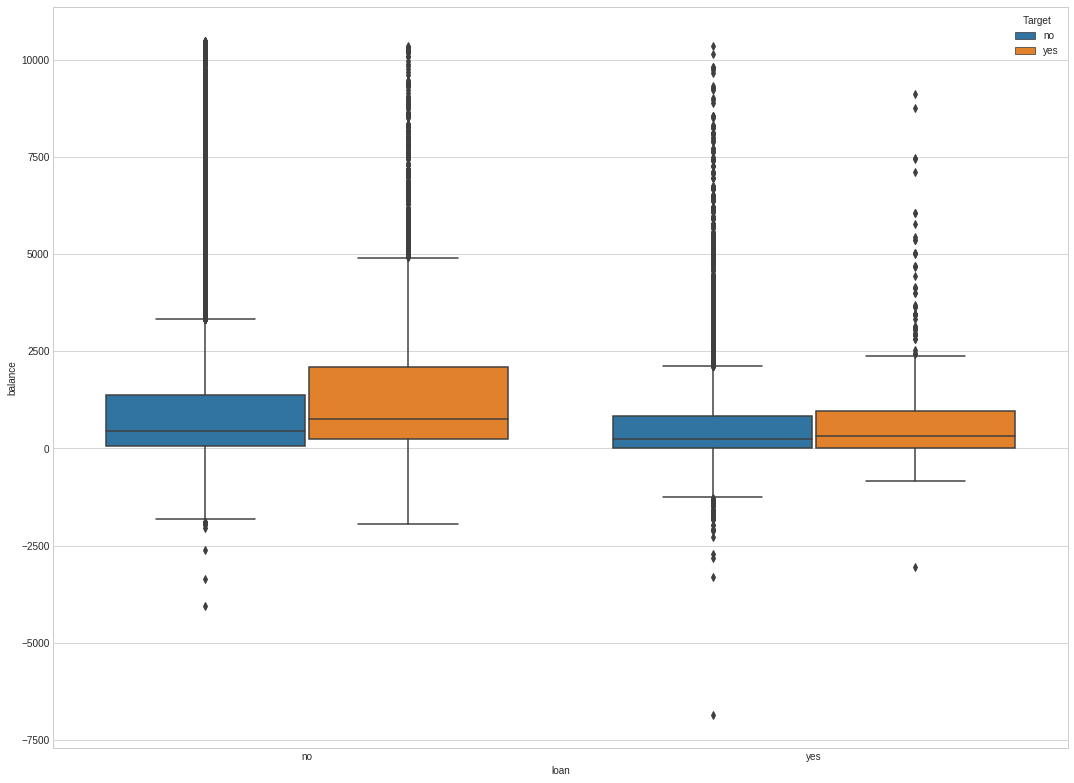

In [51]:
#imapct of personal loan status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], hue = "Target", data=newdf2)

Insights: customers with no Personal loan seems to have higher bank balance and higer FD subscription rate 

# Let's understand how  the subscription rate get's affected by customer's housing loan status & bank balance¶

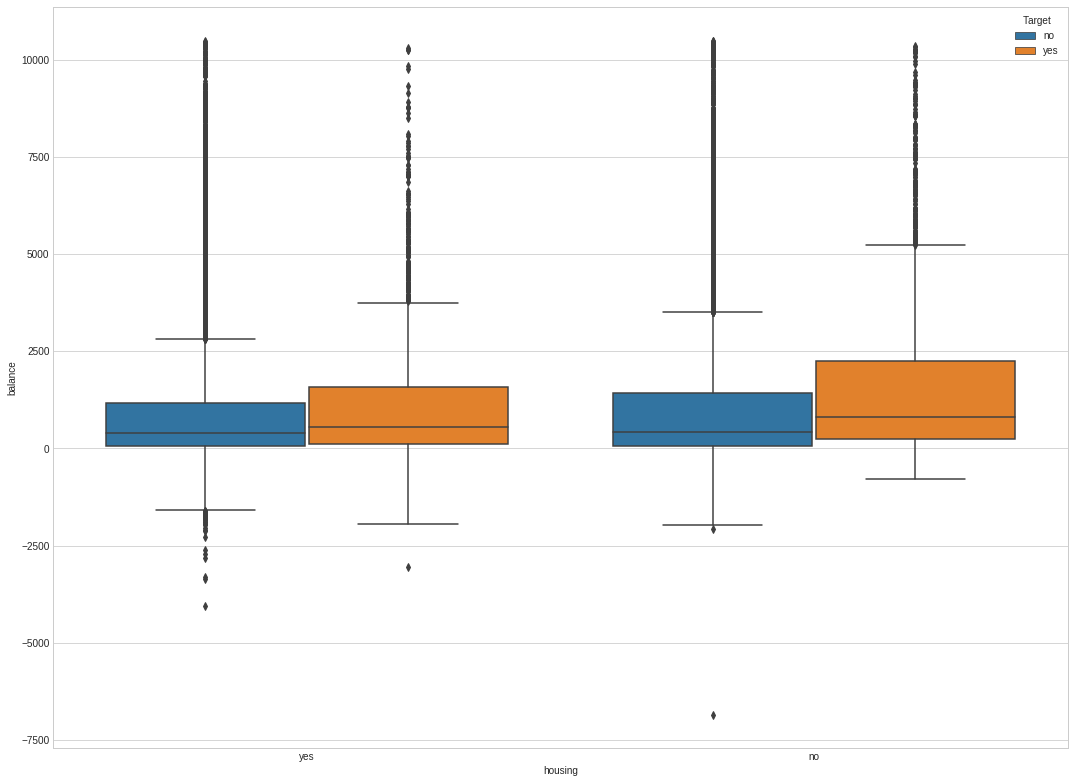

In [52]:
#imapct of housing loan status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], hue = "Target", data=newdf2)

Insights: Customers with no housing loan seems to have higher bank balance and so are more likely to opt for FD. 

# Let's understand how  the subscription rate get's affected by age & bank balance

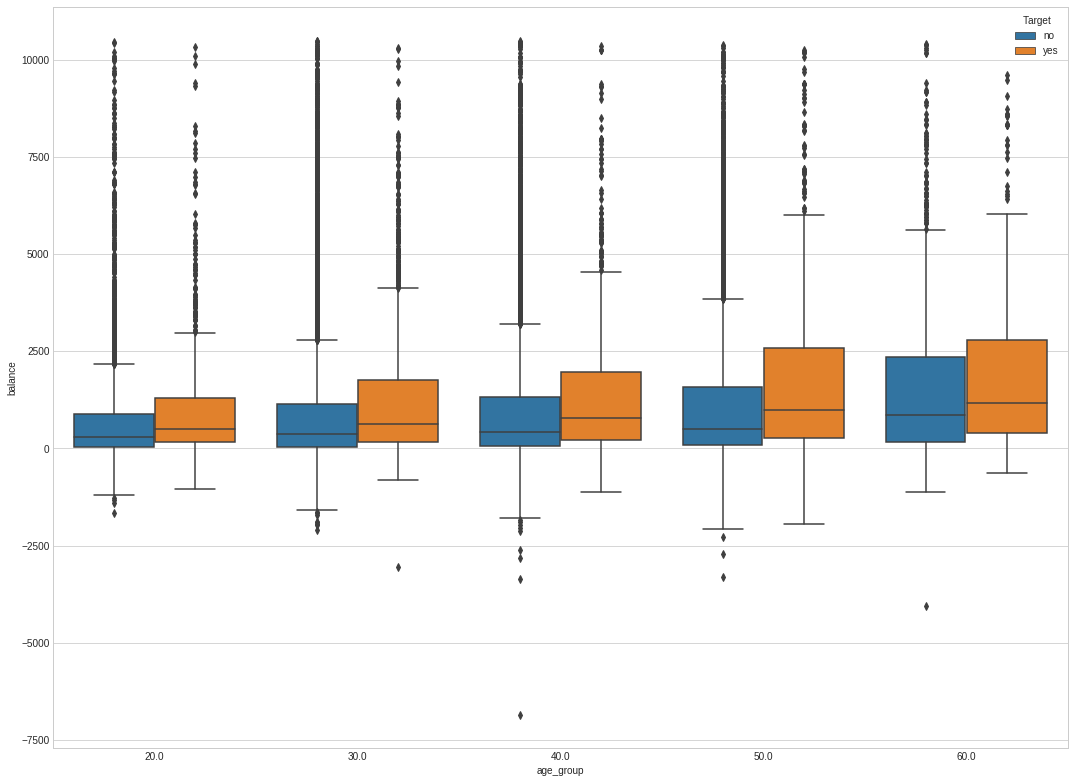

In [53]:
#imapct of contact type, bank balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['age_group'], newdf2['balance'], hue = "Target", data=newdf2)

#imapact of contact type, bank balance on fd suscription.
  - Customers falling in the age gorup of 50-60 & 60-70 seems to have higher FD subscription rate, as they have higher bank balance also. 
  - It seems like as age increases customer are more oriented towards FD as their best saving & investment option.


# Let's understand how  each numerical attributes are correlated to measure their value proposition in building our model going forward

In [54]:
#CORRELATION MATRIX FOR ALL THE NUMERICAL ATTRIBUTES: 

newdf2.corr()

# Let's Change 'month' from words to numbers for easier analysis
lst = [newdf2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
    
    


def convert(newdf2, new_column, old_column):
    newdf2[new_column] = newdf2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return newdf2[new_column].value_counts()





Correlation Matrix
                age   balance       day  duration  campaign     pdays  \
age        1.000000  0.104874 -0.008593 -0.004314  0.005596 -0.023656   
balance    0.104874  1.000000  0.010418  0.036490 -0.023321  0.013070   
day       -0.008593  0.010418  1.000000 -0.030393  0.163769 -0.094159   
duration  -0.004314  0.036490 -0.030393  1.000000 -0.085073 -0.002235   
campaign   0.005596 -0.023321  0.163769 -0.085073  1.000000 -0.089006   
pdays     -0.023656  0.013070 -0.094159 -0.002235 -0.089006  1.000000   
month_int  0.091721  0.101052  0.100190 -0.011132  0.057093 -0.109412   
previous   0.001154  0.029837 -0.052084  0.001236 -0.032407  0.453749   

           month_int  previous  
age         0.091721  0.001154  
balance     0.101052  0.029837  
day         0.100190 -0.052084  
duration   -0.011132  0.001236  
campaign    0.057093 -0.032407  
pdays      -0.109412  0.453749  
month_int   1.000000 -0.035696  
previous   -0.035696  1.000000  


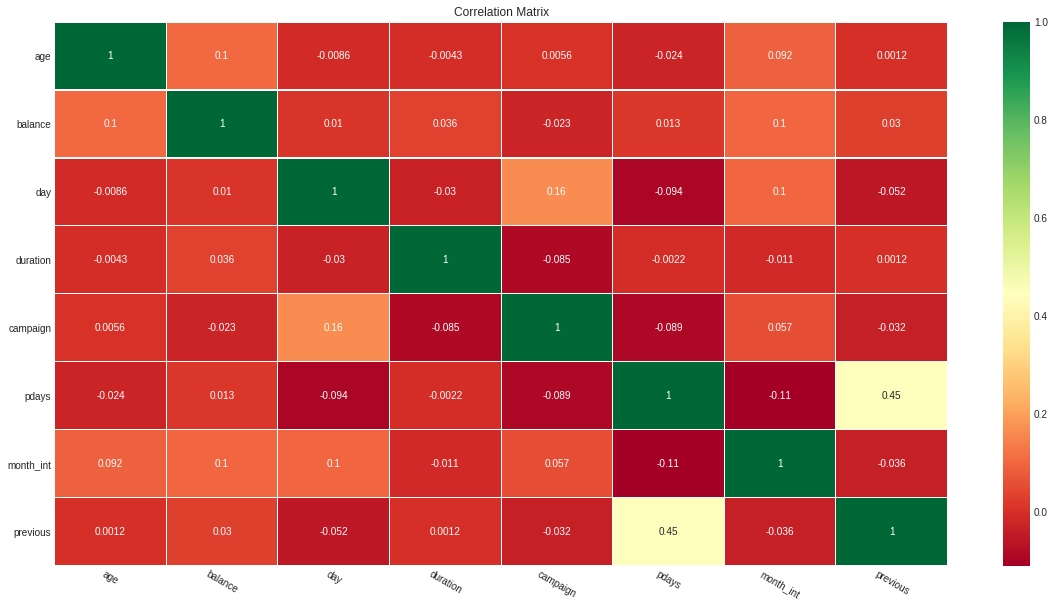

In [55]:
corr_data = newdf2[['age','balance','day','duration','campaign','pdays','month_int', 'previous','Target']]
corr = corr_data.corr()
print("Correlation Matrix")
print(corr)

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


Quick Insights On Correlation Matrix: 
    -  Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. 
    - We will further understand their influences on campaign outcome while building ML models.
    

# Pairplot Analysis For All Numercial Attributes:

In [56]:
#sns.pairplot(newdf2,diag_kind="kde")

# Cleaning Up Data & Preparing Data For Model Building

# 1. Removing Any Missing Or Meaningless Values

In [57]:
#As we saw at the start of the project that there are no missing value as such

newdf2.describe()

,age,balance,day,duration,campaign,pdays,previous,age_group,month_int
count,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000
mean,40.882382,1084.544483,15.803558,4.300972,2.765506,40.244614,0.579544,36.264112,6.128345
std,10.596139,1721.069271,8.328517,4.290663,3.100462,100.268044,2.310143,10.347819,2.397347
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,20.000000,1.000000
25%,33.000000,68.000000,8.000000,1.720000,1.000000,-1.000000,0.000000,30.000000,5.000000
50%,39.000000,431.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,30.000000,6.000000
75%,48.000000,1347.000000,21.000000,5.320000,3.000000,-1.000000,0.000000,40.000000,8.000000
max,95.000000,10483.000000,31.000000,81.970000,63.000000,871.000000,275.000000,60.000000,12.000000


In [58]:
#Let's See below what are the attributes which has some meaningless data which are not adding any vals for building better model
newdf2.head(45212)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_group,balance_group,month_int
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no,50.0,average balance,5.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no,40.0,low balance,5.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no,30.0,low balance,5.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no,40.0,average balance,5.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,30.0,low balance,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.28,3,-1,0,unknown,yes,50.0,low balance,11.0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.60,2,-1,0,unknown,yes,60.0,average balance,11.0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,18.78,5,184,3,success,yes,60.0,high balance,11.0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.47,4,-1,0,unknown,no,50.0,low balance,11.0


There are attributes having values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.
     - poutcome has many unknown values which doesn't makes any sense, so we can remove it. 
     - Let's identify and treat them below    

In [59]:
# Step 1: Delete the rows in  column 'poutcome' where it contains 'other'
condition = newdf2.poutcome == 'other'
newdf2.drop(newdf2[condition].index, axis = 0, inplace = True)
newdf2.describe()
                         
                         

,age,balance,day,duration,campaign,pdays,previous,age_group,month_int
count,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000
mean,40.936778,1080.688624,15.862491,4.302735,2.778054,32.207740,0.434844,36.321995,6.159732
std,10.577936,1719.946765,8.329704,4.297314,3.140477,90.852678,1.563521,10.337637,2.361071
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,20.000000,1.000000
25%,33.000000,66.000000,8.000000,1.720000,1.000000,-1.000000,0.000000,30.000000,5.000000
50%,39.000000,425.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,30.000000,6.000000
75%,48.000000,1341.500000,21.000000,5.300000,3.000000,-1.000000,0.000000,40.000000,8.000000
max,95.000000,10483.000000,31.000000,81.970000,63.000000,871.000000,55.000000,60.000000,12.000000


#As we removed other variable from poutcome attribure we can see that now the total record count has changed to 43371 from original 45211


# Treating Education & Job Column 

In [60]:
for col in newdf2.select_dtypes(include='object').columns:
    print(col)
    print(newdf2[col].unique())


job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'success']
Target
['no' 'yes']
balance_group
['average balance' 'low balance' 'no balance' 'high balance']


As you can see by the ouput of our unique method there are some values like unknown in job & education column. So we can replace them with more meaningful value called others to make some sense.

Let's treat these attributes below:

In [61]:
newdf2[['job','education']] = newdf2[['job','education']].replace(['unknown'],'other')

#Let's See our dataframe & verify if it has been updated
print("\n\nAfter Treatment", newdf2['education'].count)




After Treatment <bound method Series.count of 0         tertiary
1        secondary
2        secondary
3            other
4            other
           ...    
45205    secondary
45206     tertiary
45207      primary
45208    secondary
45209    secondary
Name: education, Length: 42659, dtype: object>


# Let's get rid of contact Column As It has no significant role to play in predicting outcome. 

In [62]:
newdf2['contact'].value_counts() 

cellular     27170
unknown      12822
telephone     2667
Name: contact, dtype: int64

insights:
      - As contact has almost 29 % data which has uknown value it has no significant role to play in predciting the model outcome. 
      - contact type seems to be not so important feature here so we can drop it form the dataframe  

In [63]:
# Drop column "contact" which seems to be not so useful

new_df1 = newdf2.copy()
newdf2.drop('contact', axis=1, inplace = True)
new_df2 = newdf2.copy()

In [64]:
# Let's get rid of  customer values with 'other' in education column as it doesn't make any sense to have such values in making any useful predcition .

logic = (new_df2['education'] == 'other')
new_df2.drop(new_df2[logic].index, axis = 0, inplace = True)
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 45209
Data columns (total 19 columns):
age              40901 non-null int64
job              40901 non-null object
marital          40901 non-null object
education        40901 non-null object
default          40901 non-null object
balance          40901 non-null int64
housing          40901 non-null object
loan             40901 non-null object
day              40901 non-null int64
month            40901 non-null object
duration         40901 non-null float64
campaign         40901 non-null int64
pdays            40901 non-null int64
previous         40901 non-null int64
poutcome         40901 non-null object
Target           40901 non-null object
age_group        40901 non-null float64
balance_group    40901 non-null object
month_int        40901 non-null float64
dtypes: float64(3), int64(6), object(10)
memory usage: 6.2+ MB


# Pre-Processing Data
   In this section we will deal with 
   - Transforming the required attribute which are categorical to numerical so that our mdoel can process 
   - Data imbalance
   - Steps to treat data imbalance
   - Selcting most relevant features for model building

## Transforming All Categorical Column to Numercial Values using encoding

In [65]:

# Function to replace marital values with numercial
def marital_num(df):
    mar= [df]
    for data in mar: 
        data.loc[data['marital'] == "married", "marital_int"] = 1
        data.loc[data['marital'] == "single", "marital_int"] = 2
        data.loc[data['marital'] == "divorced", "marital_int"] = 3
        
#Job

#JOB: 
def job_num(df):
    jb= [df]
    for data in jb: 
        data.loc[data['job'] == "management", "Job_int"] = 1
        data.loc[data['job'] == "technician", "Job_int"] = 2
        data.loc[data['job'] == "entrepreneur", "Job_int"] = 3
        data.loc[data['job'] == "blue-collar", "Job_int"] = 4
        data.loc[data['job'] == "retired", "Job_int"] = 5
        data.loc[data['job'] == "admin.", "Job_int"] = 6
        data.loc[data['job'] == "services", "Job_int"] = 7
        data.loc[data['job'] == "self-employed", "Job_int"] = 8
        data.loc[data['job'] == "unemployed", "Job_int"] = 9
        data.loc[data['job'] == "student", "Job_int"] = 10
        data.loc[data['job'] == "housemaid", "Job_int"] = 11
        data.loc[data['job'] == "other", "Job_int"] = 12
        
#Education:

def edu_num(df):
    edu= [df]
    for data in edu: 
        data.loc[data['education'] == "primary", "education_int"] = 1
        data.loc[data['education'] == "secondary",  "education_int"] = 2
        data.loc[data['education'] == "tertiary", "education_int"] = 3
        data.loc[data['education'] == "unknown", "education_int"] = 4
    

#    
def pout_num(df):
    pout= [df]
    for data in pout: 
        data.loc[data['poutcome'] == "failure", "poutcome_int"] = 1
        data.loc[data['poutcome'] == "success",  "poutcome_int"] = 2
        data.loc[data['poutcome'] == "unknown", "poutcome_int"] = 3  


marital_num(new_df2)
job_num(new_df2)
edu_num(new_df2)
pout_num(new_df2)
    

convert(new_df2, "housing_binary", "housing")
convert(new_df2, "default_binary", "default")
convert(new_df2, "loan_binary", "loan")
convert(new_df2, "Fd Outcome", "Target")


new_df2.drop(['age','job', 'balance_group','housing','marital', 'default', 'loan', 'housing', 'education', 'month', 'poutcome', 'Target'], axis = 1, inplace = True) 
new_df2

,balance,day,duration,campaign,pdays,previous,age_group,month_int,marital_int,Job_int,education_int,poutcome_int,housing_binary,default_binary,loan_binary,Fd Outcome
0,2143,5,4.35,1,-1,0,50.0,5.0,1.0,1.0,3.0,3.0,1,0,0,0
1,29,5,2.52,1,-1,0,40.0,5.0,2.0,2.0,2.0,3.0,1,0,0,0
2,2,5,1.27,1,-1,0,30.0,5.0,1.0,3.0,2.0,3.0,1,0,1,0
5,231,5,2.32,1,-1,0,30.0,5.0,1.0,1.0,3.0,3.0,1,0,0,0
6,447,5,3.62,1,-1,0,20.0,5.0,2.0,1.0,3.0,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,505,17,6.43,2,-1,0,20.0,11.0,2.0,2.0,2.0,3.0,0,0,1,1
45206,825,17,16.28,3,-1,0,50.0,11.0,1.0,2.0,3.0,3.0,0,0,0,1
45207,1729,17,7.60,2,-1,0,60.0,11.0,3.0,5.0,1.0,3.0,0,0,0,1
45208,5715,17,18.78,5,184,3,60.0,11.0,1.0,5.0,2.0,2.0,0,0,0,1


# Data Imabalance: 

In [66]:
new_df2['Fd Outcome'].value_counts()

0    36262
1     4639
Name: Fd Outcome, dtype: int64

The target column is having high level of imbalance in terms of yes & no distribution with no leading with 88% and yes only with 12%.
This kind of imbalance leads to ambiguity in model accuracy & predcition.We will take care of the data imbalances later on. 

# Let's Do A Pairplot Analysis:
Before we move ahead to clean & pre-process our data. As all our attributes has been transformed to numercial values.


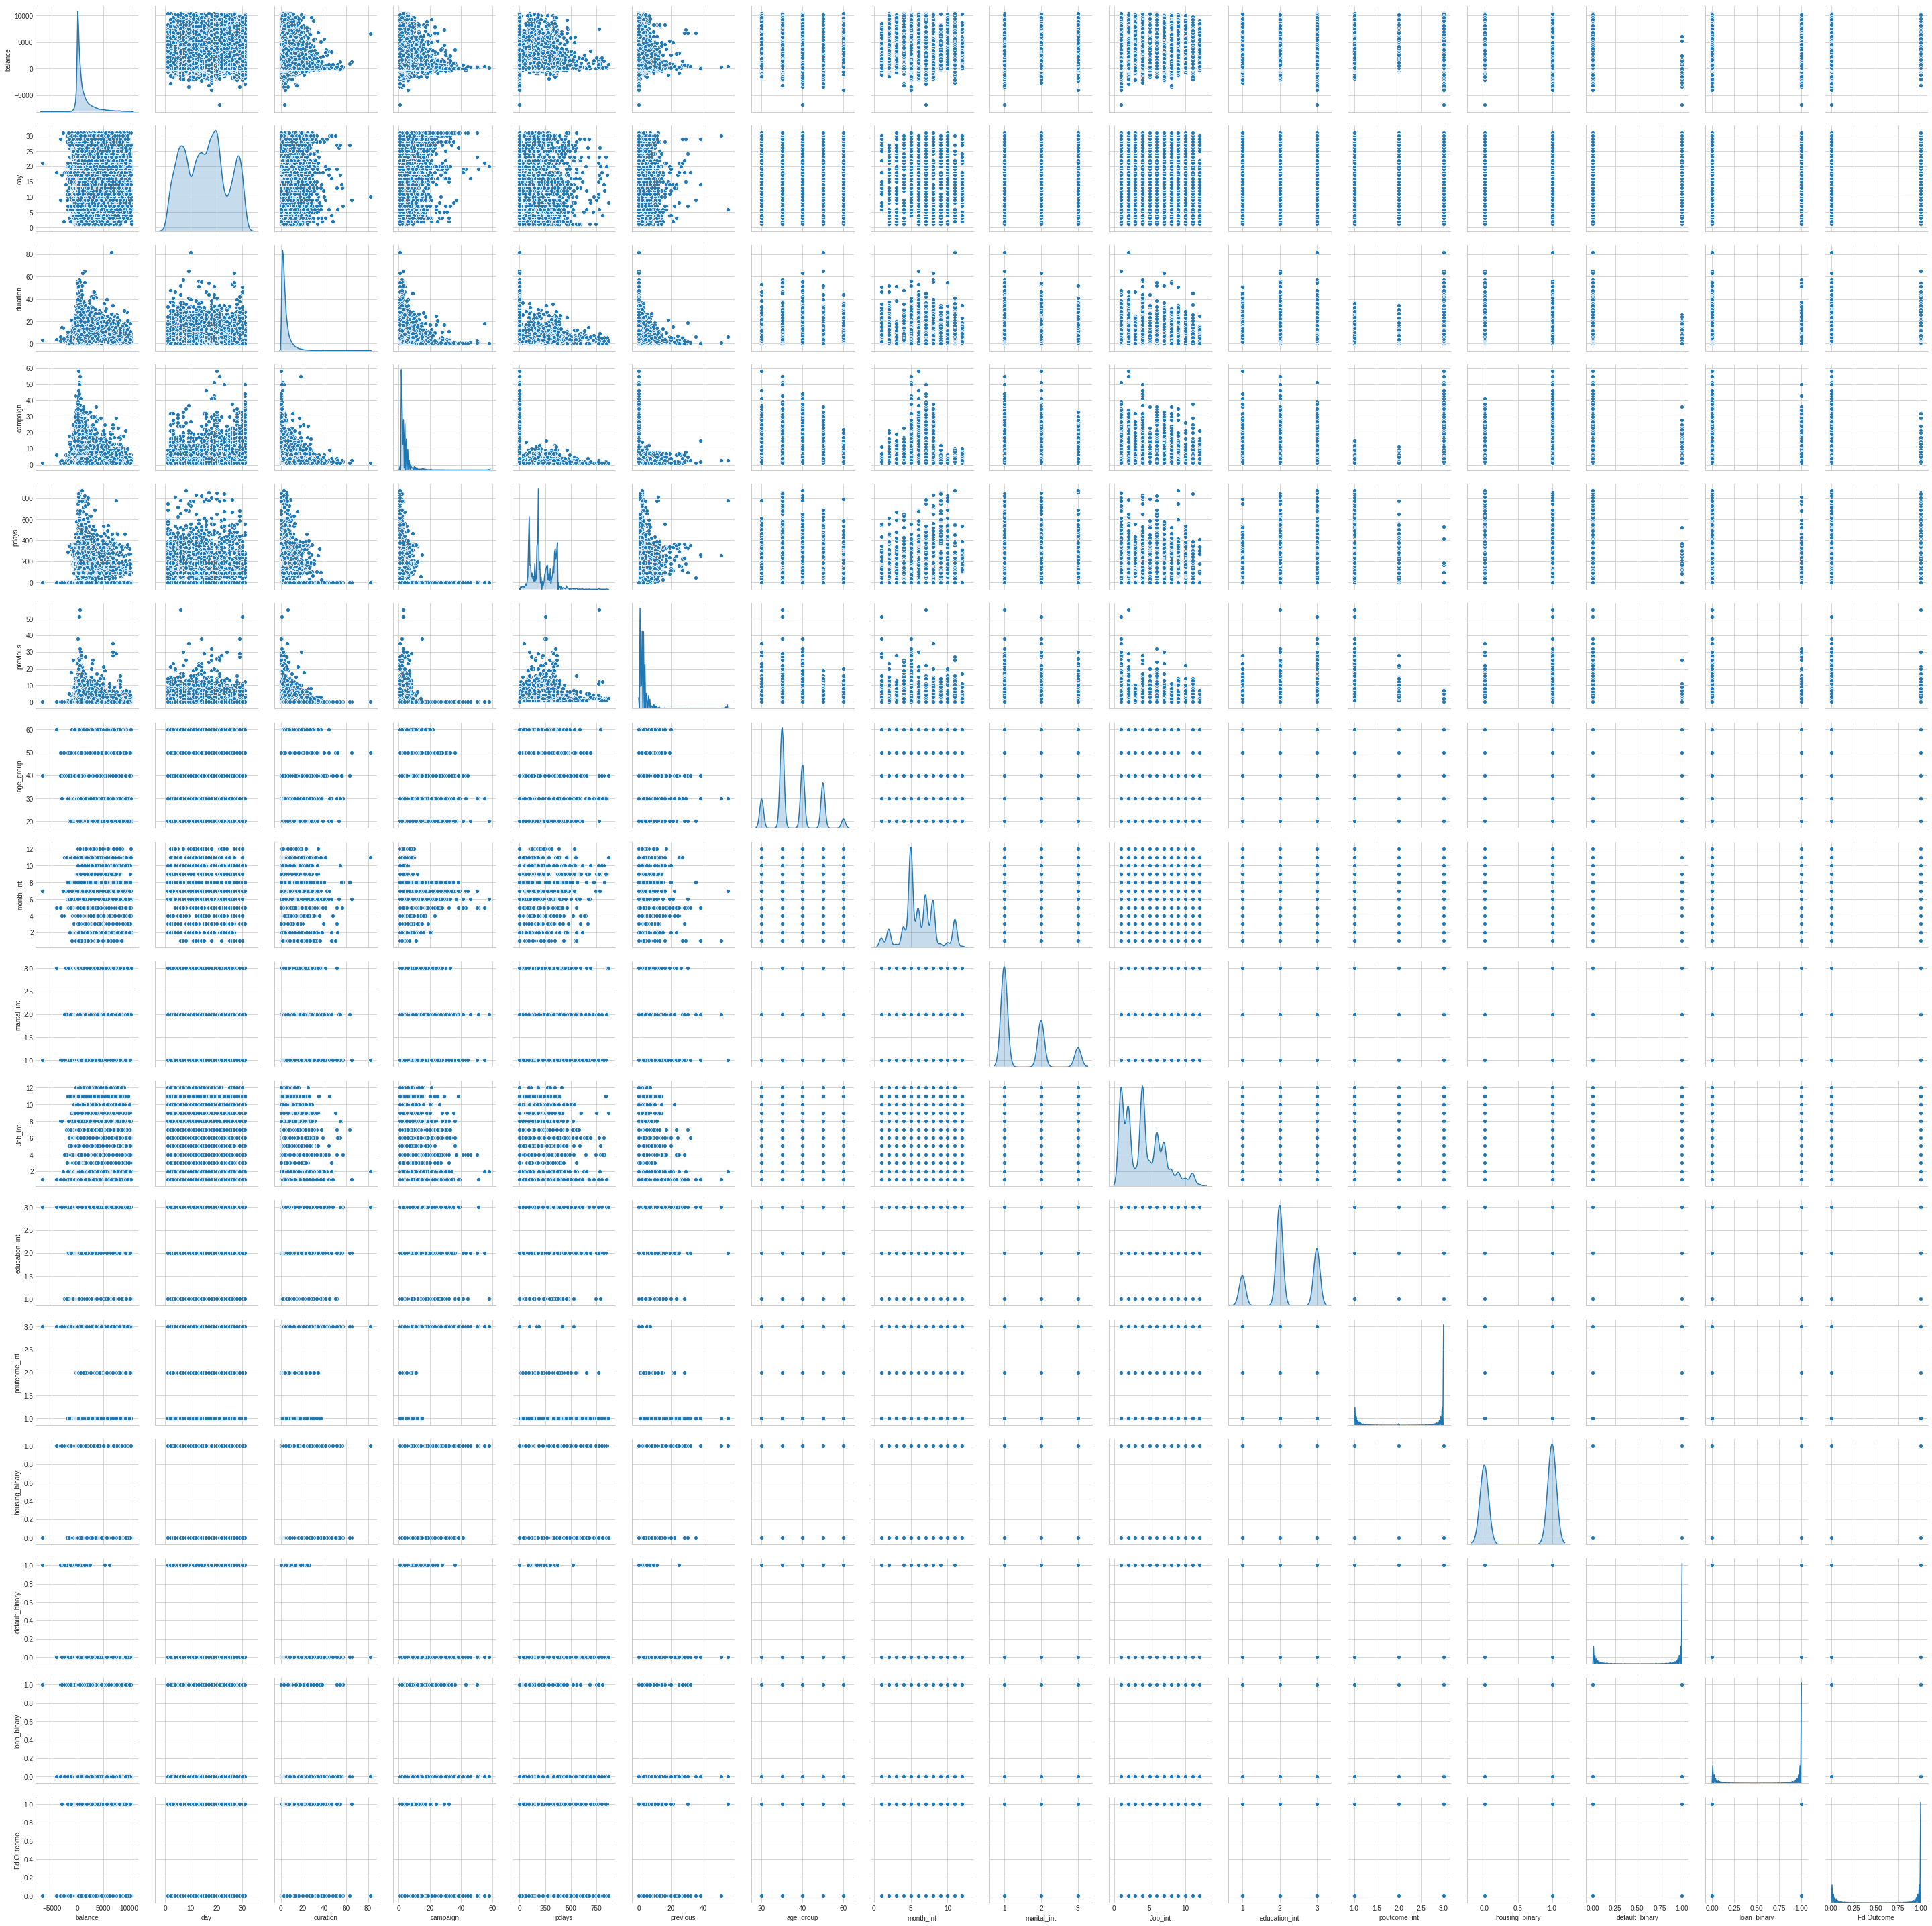

In [67]:
sns.pairplot(new_df2,diag_kind="kde")

# Let's Create Some Important Functions Which will be used frequently in our model building:


In [68]:
# # # Models to Fit & Evaluate

#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#Fitting the model
 
def fit_test_model(model, X_train, y_train, X_test):
    # Train the model
    model.fit(X_train, y_train)
    # Y Hat Prediction on Test Data
    model_pred = model.predict(X_test)
    return model_pred

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()



# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    #Return the performance metric
    return model_cross

# Function to calculate Accuracy Score
def model_accuracy_score(model, X_train, y_train, X_test):
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    accu_score = accuracy_score(y_test, model_pred)
    return accu_score


# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1] )
    print("Confusion Matrix Is:", cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2] , yticklabels = [str1, str2] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Function to calculate Precision Score For Class 0
def precision_score_class_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    precision= precision_score(y_test, model_pred, pos_label=0) 
    return precision 

# Function to calculate Precision Score For Class 1
def precision_score_class_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    precision= precision_score(y_test, model_pred, pos_label=1) 
    return precision 

# Function to calculate Recall Score For Class 0
def recallscore_class_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    recallscore= recall_score(y_test, model_pred, pos_label=0) 
    return recallscore  

# Function to calculate Recall Score For Class 1
def recallscore_class_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    recallscore= recall_score(y_test, model_pred, pos_label=1) 
    return recallscore 

# Function to calculate F1 Score For Class 0
def f1score_0(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    fscore= f1_score(y_test, model_pred, pos_label=0) 
    return fscore 


# Function to calculate F1 Score For Class 1
def f1score_1(model,X_train, y_train, X_test):
    # Make predictions and evalute
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    # Take turns considering the positive class either 0 or 1
    fscore= f1_score(y_test, model_pred, pos_label=1) 
    return fscore 

#Print Classification Report Metrics
def classificationreport(y_test, yhat):
    # Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    class_report= classification_report(y_test, yhat)
    return class_report 

#Function To plot ROC Curve: For Given Model
def roc_auc_curve(model, X_test,TITLE):
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # Calculating roc_auc score
    rocauc = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(10,10))
    plt.title(TITLE)
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % rocauc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
def prec_recall_curve(model,X_train, y_train, X_test, STR):   
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # predict class values
    yhat = fit_test_model(model,X_train, y_train, X_test)
    #calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    # calculate F1 score
    f1 = f1_score(y_test, yhat)
   #calculate precision-recall AUC
    aucscore = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y_test, probs)
    print('f1=%.3f auc=%.3f ap=%.3f' % (f1, aucscore, ap))
    # plot no skill
    plt.figure(figsize=(10,10))
    plt.title(STR)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()


# Creating two different data sets of dependent and independent attributes

- We will separate data into feature & target set
- Then we will split our data sets into train & test data

In [69]:
from sklearn.model_selection import train_test_split

# # # Split Into Training and Testing Sets

# Separate out the features and targets & Print Their Shape.
#features = new_df2.drop(columns='Fd Outcome')
#targets = pd.DataFrame(new_df2['Fd Outcome'])

array = new_df2.values

X = array[:,0:15]
y = array[:,15]

#print("Y value is : ", y)
#print("\nTarget value is : ", targets)

# Split into 70% training and 30% testing set
#X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# Feature Scaling: 

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

Specially when there is any algorithm that computes distance or assumes normality, scale your features1. When dealing with datframe series with diffrent unit type and if the diffrence of sclae within the series varies a lot, we should look for feature scaling as a major pre-processing step before ml model building. 

# Standardization: Why ?

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

μ=0 and σ=1.

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptron.

We will use Min-Max Scaler/standardscaler as this will suit to our requirement: 

# Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others.


# Min-Max Scaling  & Standard Scaler

In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#MINMAX: 
minmax= MinMaxScaler()
X_train2 = pd.DataFrame(minmax.fit_transform(X_train))
X_test2 = pd.DataFrame(minmax.transform(X_test))


MinMax_X_train = X_train2
MinMax_X_test = X_test2
#print("Mimmax scaled train data\n", MinMax_X_train)
#print("Mimmax scaled test data\n", MinMax_X_test)

#STANDARD Sclaer: 

stdsc= StandardScaler()
X_train3 = pd.DataFrame(stdsc.fit_transform(X_train))
X_test3 = pd.DataFrame(stdsc.transform(X_test))

StdSc_X_train = X_train3
StdSc_X_test = X_test3


In [71]:
from sklearn.preprocessing import Normalizer
from scipy import stats

#Normalization Using Normalizer(): 
norm= Normalizer()
X_train4 = pd.DataFrame(norm.fit_transform(X_train))
X_test4 = pd.DataFrame(norm.transform(X_test))

Norm_X_train = X_train4
Norm_X_test = X_test4


# Hunt For Best Base Classification Supervised Learning Model: 



# 1. Logistic Model 
    
    We will make use of both non-scaled & Scaled data (X_train, X_test & MinMax_X_train, MinMax_X_test):
    

Accuracy Score Is :  0.8909624317496536
LogisticRegression F1 score = 0.3023983315954119
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     10850
         1.0       0.58      0.20      0.30      1421

    accuracy                           0.89     12271
   macro avg       0.74      0.59      0.62     12271
weighted avg       0.87      0.89      0.87     12271

Confusion Matrix Is: [[10643   207]
 [ 1131   290]]


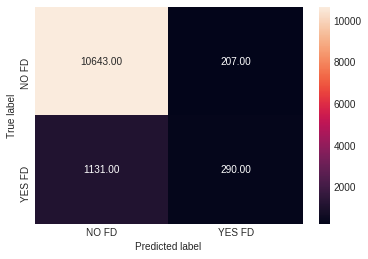

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.900008149295086
SVC F1 score = 0.38741887169246125
SVC classification Score = 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     10850
         1.0       0.67      0.27      0.39      1421

    accuracy                           0.90     12271
   macro avg       0.79      0.63      0.67     12271
weighted avg       0.88      0.90      0.88     12271

Confusion Matrix Is: [[10656   194]
 [ 1033   388]]


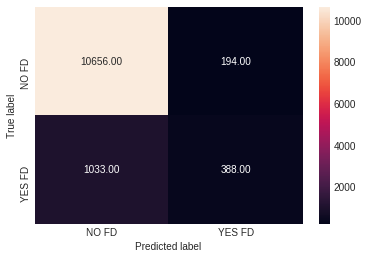

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.899356205688208
KNeighborsClassifier F1 score = 0.37341451040081175
KNeighborsClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     10850
         1.0       0.67      0.26      0.37      1421

    accuracy                           0.90     12271
   macro avg       0.79      0.62      0.66     12271
weighted avg       0.88      0.90      0.88     12271

Confusion Matrix Is: [[10668   182]
 [ 1053   368]]


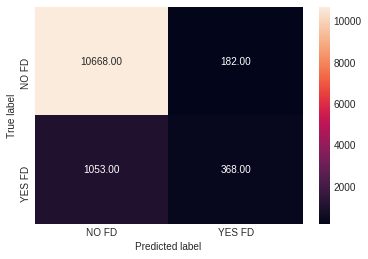

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.8389699291011328
GaussianNB F1 score = 0.38936959208899874
GaussianNB classification Score = 
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.91     10850
         1.0       0.35      0.44      0.39      1421

    accuracy                           0.84     12271
   macro avg       0.64      0.67      0.65     12271
weighted avg       0.86      0.84      0.85     12271

Confusion Matrix Is: [[9665 1185]
 [ 791  630]]


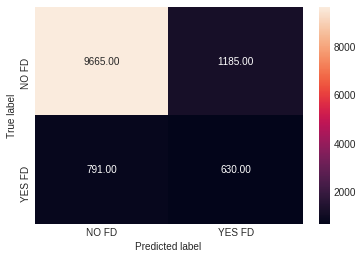

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.902615923722598
DecisionTreeClassifier F1 score = 0.4677060133630289
DecisionTreeClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     10850
         1.0       0.64      0.37      0.47      1421

    accuracy                           0.90     12271
   macro avg       0.78      0.67      0.71     12271
weighted avg       0.89      0.90      0.89     12271

Confusion Matrix Is: [[10551   299]
 [  896   525]]


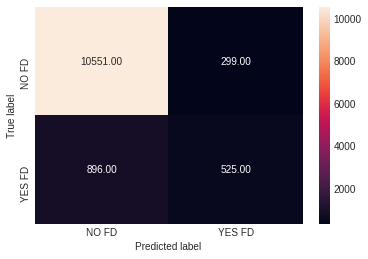

Confusion Matrix HeatMap :  None


In [72]:
#precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score

lr = LogisticRegression()
clf = SVC()
knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p= 2)
NB = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#rfc = RandomForestClassifier(n_estimators=40)

def scorer(i,j,k,l, m):
    for every in (i,j,k,l,m):
        every.fit(StdSc_X_train,y_train)
        yhat= every.predict(StdSc_X_test)
        #every.fit(X_train,y_train)
        print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
        print(every.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
        print(every.__class__.__name__, 'classification Score =','\n', classification_report(y_test,yhat))
        print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "NO FD", "YES FD"))
        
scorer (lr,clf,knn,NB,dtree)



# Let's Analyse The Above Output: 

**But let's first define our business objective first so that we can choose the right metrics to measure and compare our base model: **

# Our Objective : 

Using the collected data from the existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Let's understand recall & precision : 

In a classification task, the precision for a class is the number of true positives (i.e. the number of items correctly labeled as belonging to the positive class) divided by the total number of elements labeled as belonging to the positive class (i.e. the sum of true positives and false positives, which are items incorrectly labeled as belonging to the class). Recall in this context is defined as the number of true positives divided by the total number of elements that actually belong to the positive class (i.e. the sum of true positives and false negatives, which are items which were not labeled as belonging to the positive class but should have been).

In our given objective it will be great to have high recall value, which will lead to low precision. 

If we get a higher recall, it may increase the chances of classifying customers who aren't intereted in FD(Negative outcome) but at the same time it will increases the chances of covering all customer who will be ineterested in FD(positive outcome). 


When we have Greater precision it decreased the chances of wrongly classifying not interested ones to be the interested one. But it also decreses the likelihood of correctly predciting the customer who are more likely to subscribe to fd .

But we will not solely base our measure only on high recall. Since out data is highly imbalanced in favour of NO. We need to consider f1 score which is a kind of trade off betweeb precision & recall being the harmonic mean of both. 

With this concept let's comapre our metrics and find the best model based on confusion matrix. 

# Selecting the base model based on precision, recall, f1 score: 

 based on our confusion matrix & classification report of precison , recall , f1 and accuracy score :
 
 Decision tree seems to fare well compared to other model. Guassian NB also seems to be quite close to decision tree but based on accuracy score, f1 score & recall score cumulatively decison tree leads the way. 
 
 But our best model still has a very low recall & f1 score which we need to maximize. We will later apply upsampling , down-sampling techniques to see if it cures the data imbalances and increases the recall & f1 score. 
 
# So our base model would be decison tree. 

We will benchamark the performance of ensemble technique against our base model to see how combining the multiple models works and improves the model performance as compared to individual model which we just analysed above.

 


## Let's Further Analyse our classification models using roc-auc curve & score 

In [73]:
NavBayer = GaussianNB()
NavBayer.fit(StdSc_X_train, y_train)

DT = DecisionTreeClassifier(criterion="entropy", max_depth=4)
DT.fit(StdSc_X_train, y_train)

SVM = SVC(probability=True)
SVM.fit(StdSc_X_train, y_train)

KNN = KNeighborsClassifier(n_neighbors=17, metric='minkowski', p= 2)
KNN.fit(StdSc_X_train, y_train)

LogReg = LogisticRegression()
LogReg.fit(StdSc_X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

None
None
None
None
None


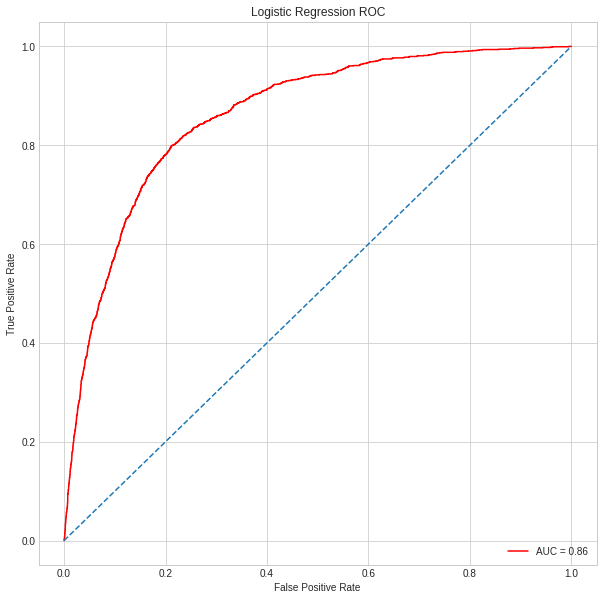

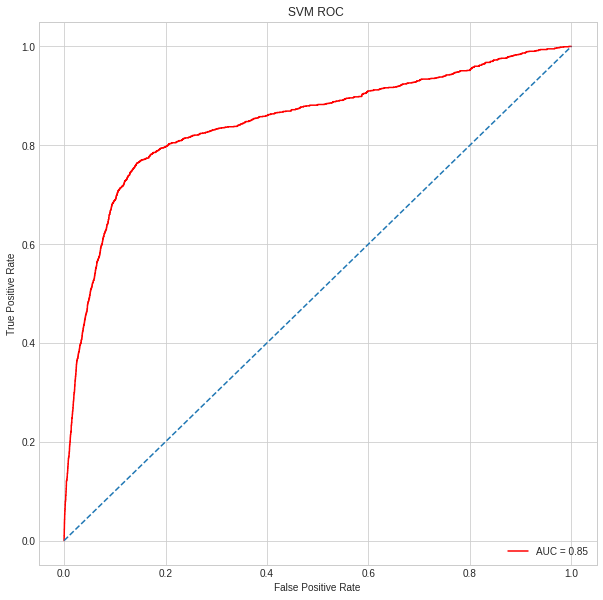

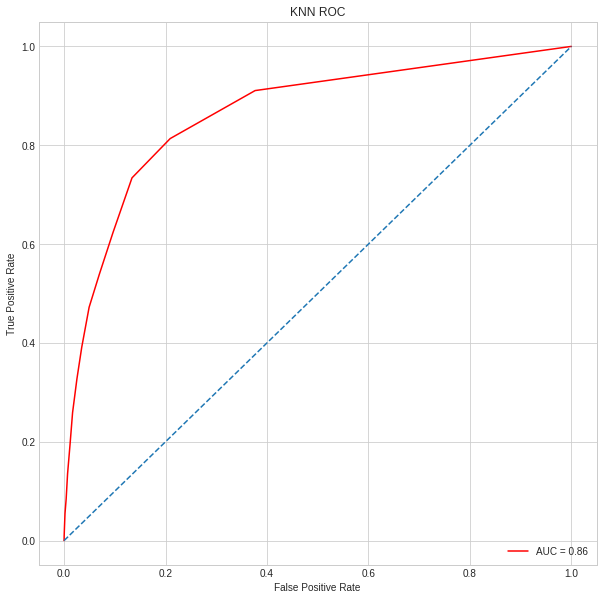

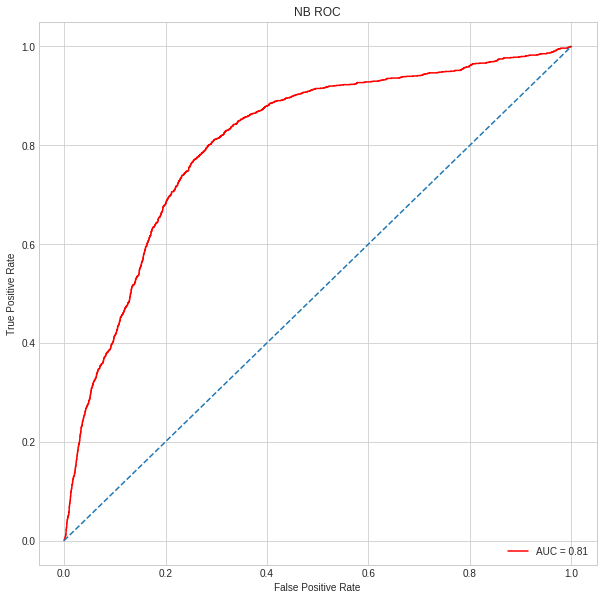

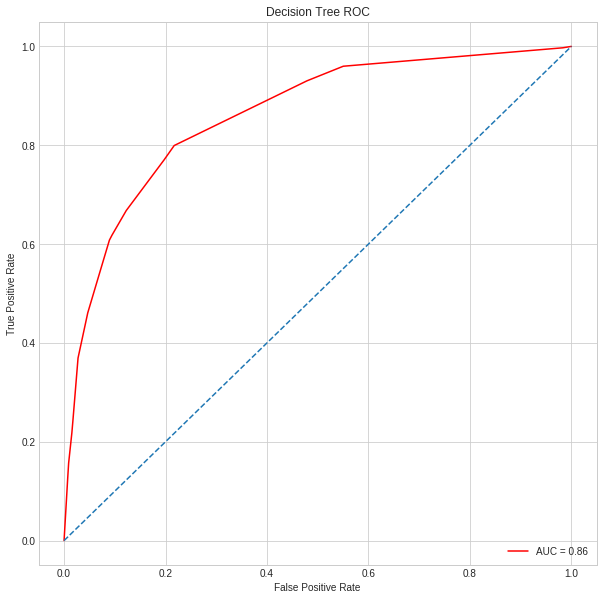

In [74]:
#roc_auc_curve()
print(roc_auc_curve(LogReg, StdSc_X_test, "Logistic Regression ROC"))
print(roc_auc_curve(SVM, StdSc_X_test, "SVM ROC "))
print(roc_auc_curve(KNN, StdSc_X_test,"KNN ROC"))
print(roc_auc_curve(NavBayer, StdSc_X_test,"NB ROC"))
print(roc_auc_curve(DT, StdSc_X_test,"Decision Tree ROC"))

# Precision-Recall Curve: For More Balanced Analysis Considering our data is imbalanced.


f1=0.302 auc=0.445 ap=0.446


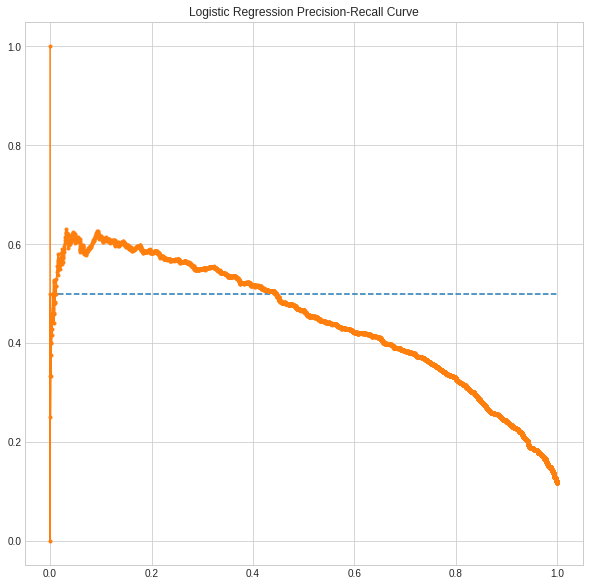

None
f1=0.387 auc=0.529 ap=0.529


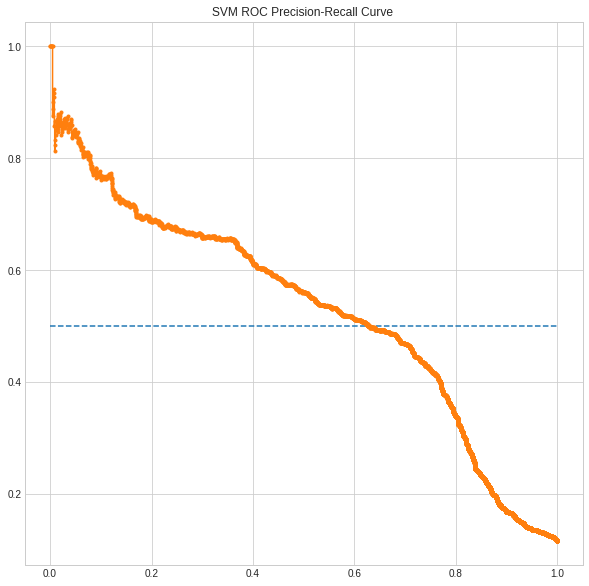

None
f1=0.373 auc=0.517 ap=0.491


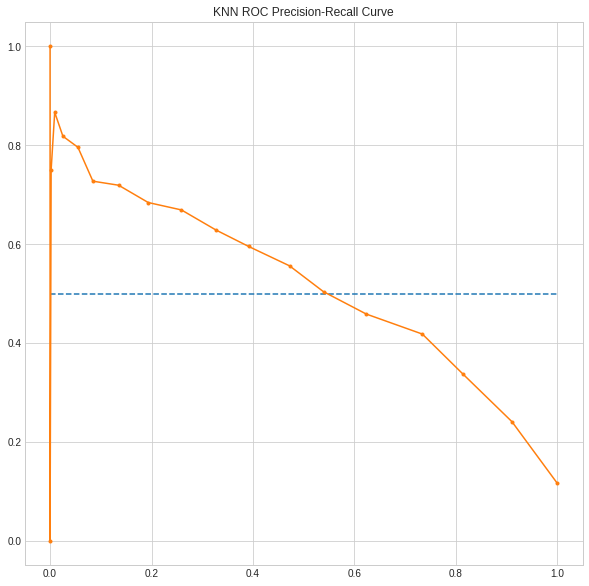

None
f1=0.389 auc=0.343 ap=0.341


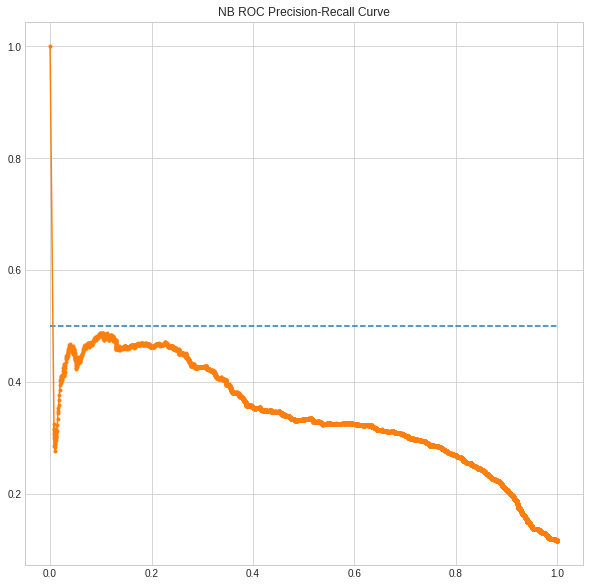

None
f1=0.468 auc=0.519 ap=0.475


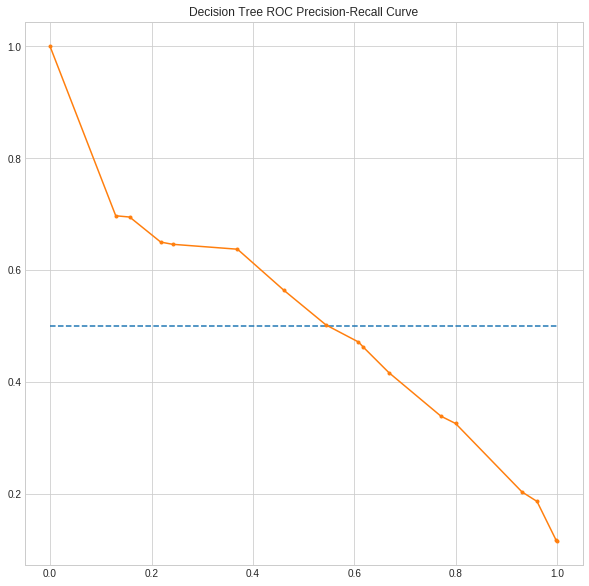

None


In [75]:
#roc_auc_curve()
#prec_recall_curve(model,X_train, y_train, X_test, STR)
print(prec_recall_curve(LogReg,StdSc_X_train, y_train, StdSc_X_test, "Logistic Regression Precision-Recall Curve"))
print(prec_recall_curve(SVM, StdSc_X_train, y_train, StdSc_X_test, "SVM ROC Precision-Recall Curve "))
print(prec_recall_curve(KNN, StdSc_X_train, y_train, StdSc_X_test,"KNN ROC Precision-Recall Curve"))
print(prec_recall_curve(NavBayer, StdSc_X_train, y_train, StdSc_X_test,"NB ROC Precision-Recall Curve"))
print(prec_recall_curve(DT, StdSc_X_train, y_train, StdSc_X_test,"Decision Tree ROC Precision-Recall Curve"))

# Quick Insights On Roc Curve & Precision Recall Curve: 
     
#Closely observing the roc curve, decision tree, logistic, SVM , NB all faired well with score of 86 % while KNN scored 81 % , but roc curve can be misleading as data is highy imbalanced .
     
#Let's see precision-recall curve which is more balanced in its approcah for this kind of data sets. It will give more clear picture of auc score and average precision score along with f1 score. 

#Here we can see decision tree has fared well compared to other models in terms of f1 score and auc score trade off. 
    

# Let's Build Model Using Ensemble Techniques: On Imbalanced Data

#Let's see how the committe based model building algo will perform compared to individual models we ananlysed before.

# 1.0 Using RandomForest Classifier: 

Confusion Matrix Is: [[10590   260]
 [  876   545]]


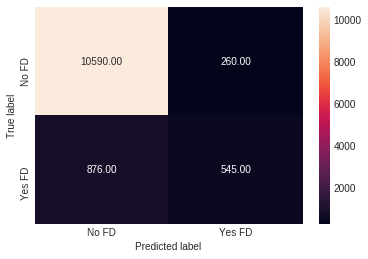

RFC Accuracy Score: 91.0
RFC F1 Score  0.48966756513926324
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10850
         1.0       0.68      0.38      0.49      1421

    accuracy                           0.91     12271
   macro avg       0.80      0.68      0.72     12271
weighted avg       0.90      0.91      0.90     12271



In [76]:


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
rfc = RandomForestClassifier(criterion='gini', n_estimators = 1000)#criterion = entopy,gini
rfc.fit(StdSc_X_train, y_train)
rfcpred = rfc.predict(StdSc_X_test)

draw_confmatrix(y_test, rfcpred,"No FD", "Yes FD")
print("RFC Accuracy Score:",round(accuracy_score(y_test, rfcpred),2)*100)
print("RFC F1 Score ",f1_score(y_test, rfcpred))
print(classificationreport(y_test,rfcpred))


        
RFCCV = (cross_val_score(rfc, StdSc_X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix Is: [[10598   252]
 [  885   536]]


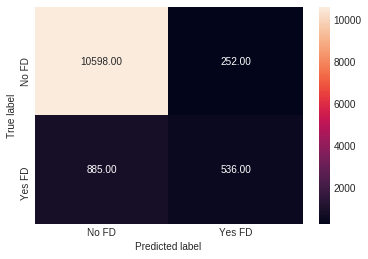

RFC Accuracy Score: 91.0
RFC F1 Score  0.4852874603893165
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10850
         1.0       0.68      0.38      0.49      1421

    accuracy                           0.91     12271
   macro avg       0.80      0.68      0.72     12271
weighted avg       0.89      0.91      0.90     12271



In [77]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
rfc = RandomForestClassifier(criterion='entropy', n_estimators = 1500, max_features= 3, max_depth = 100)#criterion = entopy,gini
rfc.fit(StdSc_X_train, y_train)
rfcpred = rfc.predict(StdSc_X_test)

draw_confmatrix(y_test, rfcpred,"No FD", "Yes FD")
print("RFC Accuracy Score:",round(accuracy_score(y_test, rfcpred),2)*100)
print("RFC F1 Score ",f1_score(y_test, rfcpred))
print(classificationreport(y_test,rfcpred))

# Quick Insights Based On Confusion Matrix:

As per confusion matrix : 
- RFC model out of 1432 actual instances where customers said yes to FD our model manage to predict correclty only 561 instances , it errored in 870 cases. 
  
- OUr model works great in predciting TN. Out of 10850 actual instances where customers refused to opt for FD , our model scored well by predicting 10587 instances correctly , erroring in 263 cases where it wrongly predcited them to be interetsed in FD . 
  
- We see the accuracy score improved to 91 % which is not so significant as compared to decision tree.
- We saw a little bit improvement in f1 score and recall score with a value of 49 % and 39 % as compared decision tree which fared to be the best choice among individual classification models. 
- We still face issue with very low recall and precision score. 

Which is again beacuase of imbalanced data sets. 

Based on  F1 score, accuracy score and recall score , random forrestor seems to be better, but still these values are not significsnt enough to trust. 

Let's further anaylse how RFC fares in roc-auc curve/score and precision-recall curve. 


# ROC Curve For RandomForres Classifier

None


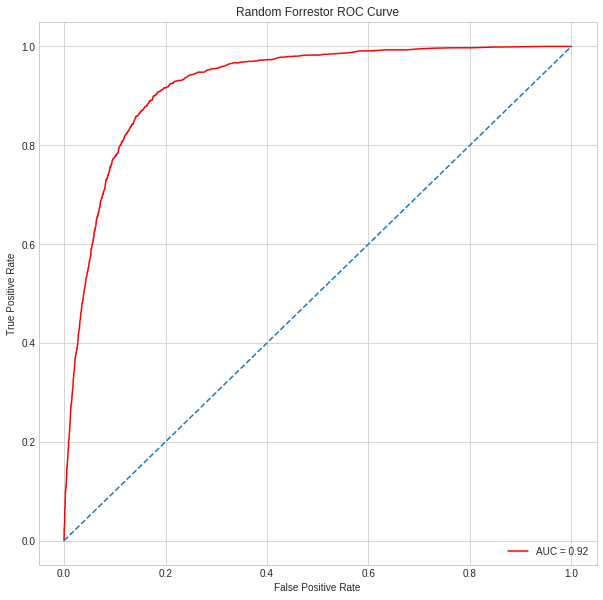

In [78]:
print(roc_auc_curve(rfc, StdSc_X_test, "Random Forrestor ROC Curve"))


# Precision-Recall Curve For RandomForrestor

f1=0.484 auc=0.611 ap=0.611


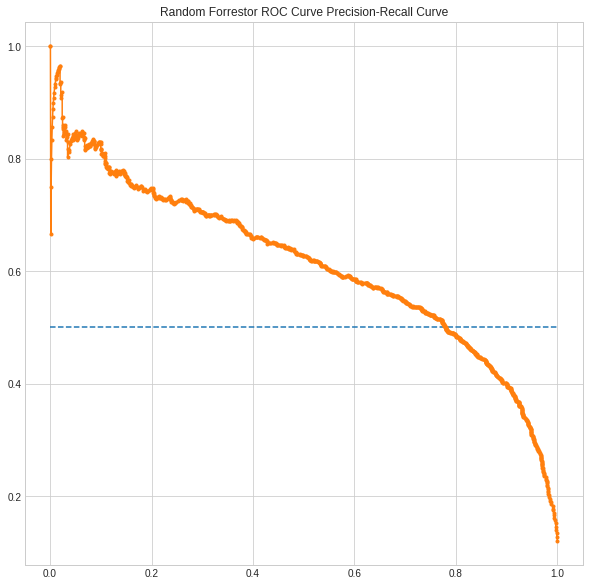

None


In [79]:

print(prec_recall_curve(rfc,StdSc_X_train, y_train, StdSc_X_test, "Random Forrestor ROC Curve Precision-Recall Curve"))

Quick Insights From RFC : Roc & Precision Recall Curve: 
         - Random forrestor performed much better in terms of area covered under the curve with an auc score of 92 %, which is much better than the decision tree and other individual classification model we compared above
         
         - Also for Precision-Recall curve,  f1 score and average precision score is better than decison tree and other individual model compared above. It's f1 score is : 0.498, auc and ap score is 60 %
         
         
 Let's not stop here and conclude. Let's rely on resampling techniques to balance out the data sets and see if it increases the recall score, f1 score for us. 
 

Confusion Matrix Is: [[10525   325]
 [  917   504]]


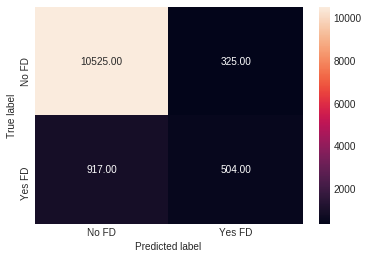

Adaboost Accuracy Score: 90.0
Adaboost F1 Score  0.448
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     10850
         1.0       0.61      0.35      0.45      1421

    accuracy                           0.90     12271
   macro avg       0.76      0.66      0.70     12271
weighted avg       0.88      0.90      0.89     12271

[[10525   325]
 [  917   504]]
90.0


In [80]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
ada = AdaBoostClassifier( n_estimators= 1000)
ada = ada.fit(StdSc_X_train, y_train)
ada_pred = ada.predict(StdSc_X_test)

draw_confmatrix(y_test, ada_pred,"No FD", "Yes FD")
print("Adaboost Accuracy Score:",round(accuracy_score(y_test, ada_pred),2)*100)
print("Adaboost F1 Score ",f1_score(y_test, ada_pred))
print(classificationreport(y_test,ada_pred))

print(confusion_matrix(y_test, ada_pred ))
print(round(accuracy_score(y_test, ada_pred),2)*100)


# ROC Curve & Precision Recall Curve Of Adaboost 

None


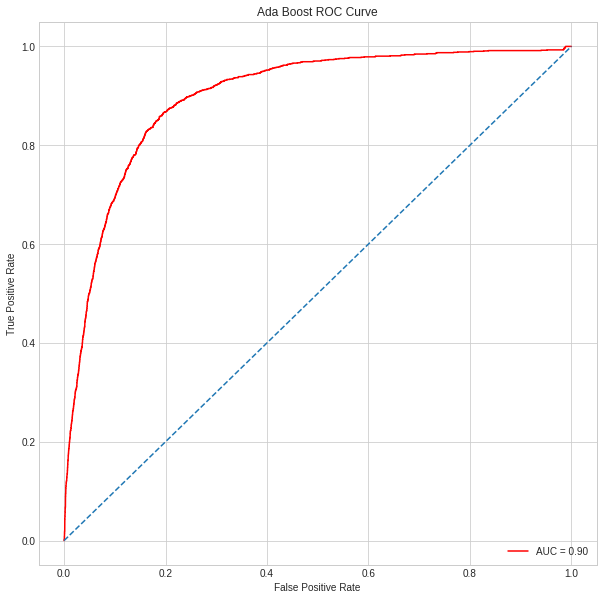

In [81]:
print(roc_auc_curve(ada, StdSc_X_test, "Ada Boost ROC Curve"))

f1=0.448 auc=0.545 ap=0.545


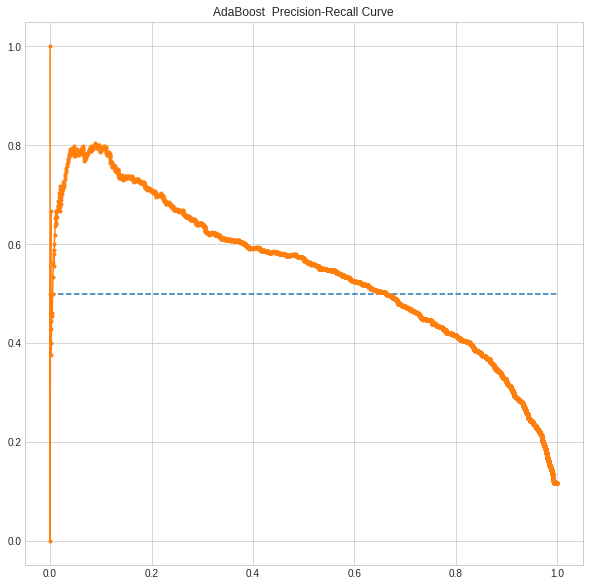

None


In [82]:
print(prec_recall_curve(ada, StdSc_X_train, y_train, StdSc_X_test, "AdaBoost  Precision-Recall Curve"))

Confusion Matrix Is: [[10511   339]
 [  778   643]]


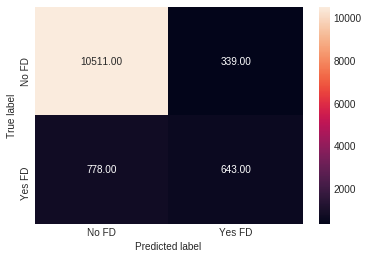

GBFC Accuracy Score: 91.0
GBFC F1 Score  0.535164377861007
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     10850
         1.0       0.65      0.45      0.54      1421

    accuracy                           0.91     12271
   macro avg       0.79      0.71      0.74     12271
weighted avg       0.90      0.91      0.90     12271

[[10511   339]
 [  778   643]]
91.0


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
Gfc = GradientBoostingClassifier( n_estimators= 1000)
Gfc = Gfc.fit(StdSc_X_train, y_train)
gfc_pred = Gfc.predict(StdSc_X_test)

draw_confmatrix(y_test, gfc_pred,"No FD", "Yes FD")
print("GBFC Accuracy Score:",round(accuracy_score(y_test, gfc_pred),2)*100)
print("GBFC F1 Score ",f1_score(y_test, gfc_pred))
print(classificationreport(y_test,gfc_pred))

print(confusion_matrix(y_test, gfc_pred ))
print(round(accuracy_score(y_test, gfc_pred),2)*100)

# ROC Curve & Precision Recall Curve Of GBC

None


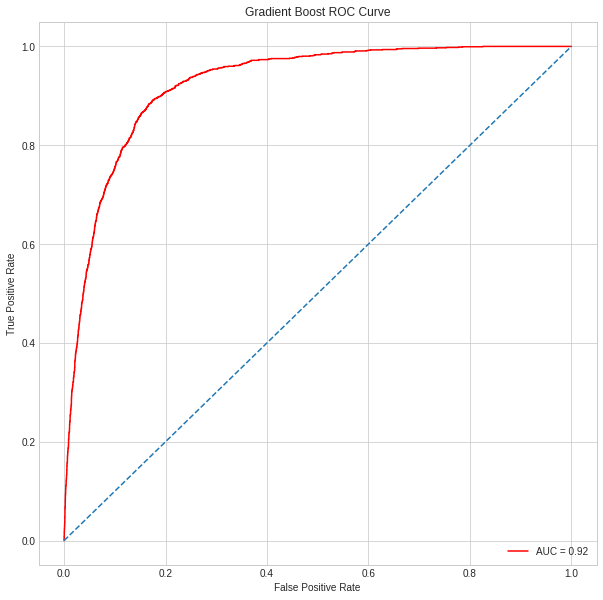

In [84]:
print(roc_auc_curve(Gfc, StdSc_X_test, "Gradient Boost ROC Curve"))


f1=0.535 auc=0.606 ap=0.606


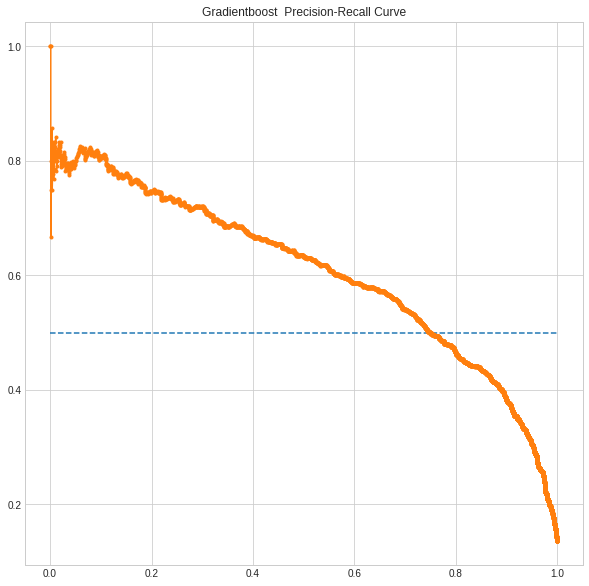

None


In [85]:
print(prec_recall_curve(Gfc,StdSc_X_train, y_train, StdSc_X_test, "Gradientboost  Precision-Recall Curve"))

## Ensemble Model Estimate:
 - Clearly gradientboost clasifier outperforms random forrestor, adaboost with 
    - Accuracy : 91 %
    - recall Score(which we are trying to maximixe ): 45 %
    - f1-score(Since data is skewed and imbalanced) : 54 % 
    
 This ensemble model also outperforms our base model where decision tree fared well and came out as the base model choice to to benchmark with.
 
 But since in all our model estimates recall score and f1 score are still not up to the mark we expect from the model, which is quite visible due to huge imbalance in data sample. we need to see how we can improve upon the same.
 
So let's fine tune our model using hyperparameter tuning to see if we can increase our recall score.   


# Curating the Data Imbalance Using Various Data Sampling Techniques Like Up Sampling & Down Sampling

#Intent here is to treat the imbalances in data set so that we can better measure the model performances and see if we can improve the recall score which is the main goal of our model here

Class imbalance is the problem that often comes along with  classification cases like the results of online campaigns, for instance. After executing new_df2['Fd Outcome'].value_counts() query below we see that the two classes of the variable ‘y’ are not represented equally in our dataset also. After data cleaning there are 36262 records belonging to the class ‘0’ and only 4639 records of the class ‘1’ in the target variable ‘y’. Prior to splitting the data into the training and testing samples, we should think of oversampling or undersampling the data.
To resample the data, let’s apply SMOTE method for oversampling from imblearn.over_sampling toolbox (for this step you may need to install imblearn package with Pip or Conda first):



In [86]:
new_df2['Fd Outcome'].value_counts()

0    36262
1     4639
Name: Fd Outcome, dtype: int64

# Oversampling Using SMOTE method: 

In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_SMOTE, y_SMOTE = sm.fit_sample(StdSc_X_train, y_train)
pd.Series(y_SMOTE).value_counts()

sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(StdSc_X_test)

Using TensorFlow backend.


# Let's Run our individual classification models on oversampled data sets:
 Let's see it it improves the precision , recal and f1 metrics. 

Accuracy Score Is :  0.8098769456442018
LogisticRegression F1 score = 0.4835067522692052
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     10850
         1.0       0.35      0.77      0.48      1421

    accuracy                           0.81     12271
   macro avg       0.66      0.79      0.68     12271
weighted avg       0.89      0.81      0.84     12271

Confusion Matrix Is: [[8846 2004]
 [ 329 1092]]


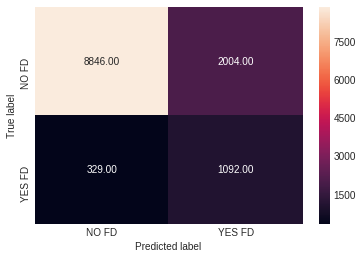

Accuracy Score Is :  0.8303316763099992
SVC F1 score = 0.5198339483394834
SVC classification Score = 
               precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     10850
         1.0       0.39      0.79      0.52      1421

    accuracy                           0.83     12271
   macro avg       0.68      0.81      0.71     12271
weighted avg       0.90      0.83      0.85     12271

Confusion Matrix Is: [[9062 1788]
 [ 294 1127]]


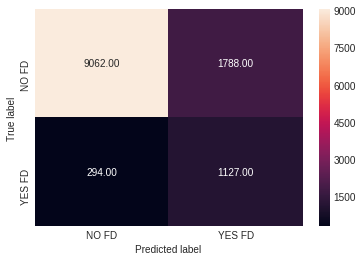

Accuracy Score Is :  0.8073506641675495
KNeighborsClassifier F1 score = 0.47513321492007105
KNeighborsClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88     10850
         1.0       0.35      0.75      0.48      1421

    accuracy                           0.81     12271
   macro avg       0.65      0.78      0.68     12271
weighted avg       0.89      0.81      0.83     12271

Confusion Matrix Is: [[8837 2013]
 [ 351 1070]]


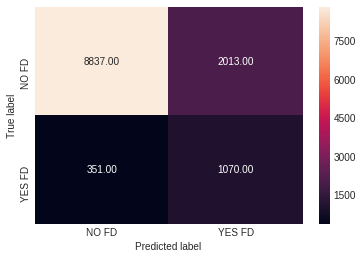

Accuracy Score Is :  0.7450900497107
GaussianNB F1 score = 0.4131332082551595
GaussianNB classification Score = 
               precision    recall  f1-score   support

         0.0       0.96      0.74      0.84     10850
         1.0       0.28      0.77      0.41      1421

    accuracy                           0.75     12271
   macro avg       0.62      0.76      0.63     12271
weighted avg       0.88      0.75      0.79     12271

Confusion Matrix Is: [[8042 2808]
 [ 320 1101]]


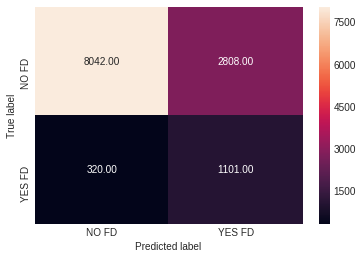

Accuracy Score Is :  0.7332735718360361
DecisionTreeClassifier F1 score = 0.42649377956895046
DecisionTreeClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     10850
         1.0       0.28      0.86      0.43      1421

    accuracy                           0.73     12271
   macro avg       0.63      0.79      0.63     12271
weighted avg       0.89      0.73      0.78     12271

Confusion Matrix Is: [[7781 3069]
 [ 204 1217]]


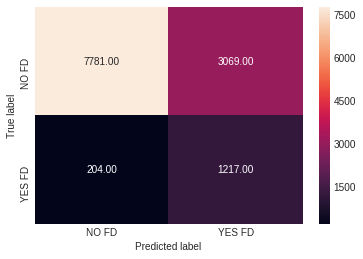

In [88]:
def scorer_bal(i,j,k,l, m):
    for model in (i,j,k,l,m):
        model.fit(X_train_std,y_SMOTE)
        yhat= model.predict(X_test_std)
        print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
        print(model.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
        print(model.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
        draw_confmatrix(y_test, yhat, "NO FD", "YES FD")
        
scorer_bal(lr,clf,knn,NB,dtree)

Accuracy Score Is :  0.9038383179854943
RandomForestClassifier F1 score = 0.5868347338935574
RandomForestClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     10850
         1.0       0.58      0.59      0.59      1421

    accuracy                           0.90     12271
   macro avg       0.77      0.77      0.77     12271
weighted avg       0.90      0.90      0.90     12271

Confusion Matrix Is: [[10253   597]
 [  583   838]]


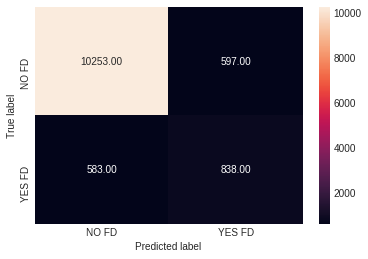

Accuracy Score Is :  0.9112541765137315
GradientBoostingClassifier F1 score = 0.5721021611001964
GradientBoostingClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     10850
         1.0       0.65      0.51      0.57      1421

    accuracy                           0.91     12271
   macro avg       0.79      0.74      0.76     12271
weighted avg       0.90      0.91      0.91     12271

Confusion Matrix Is: [[10454   396]
 [  693   728]]


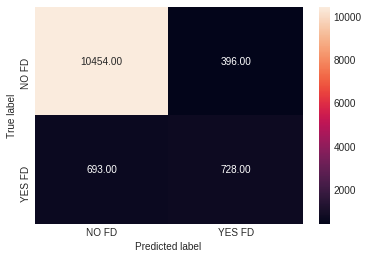

In [89]:
def scorer_bal(i,j):
    for model in (i,j):
        model.fit(X_train_std,y_SMOTE)
        yhat= model.predict(X_test_std)
        print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
        print(model.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
        print(model.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
        draw_confmatrix(y_test, yhat, "NO FD", "YES FD")


        
scorer_bal(rfc,Gfc)
#rfc : randomforest
#Gfc : gradientboost classifier

Quick Insights:
  - We can see that with oversampling to balance out the data sample we can see significant increase in the model accuracy score and recall score, Decision tree lead in individual base model race with highest recall score of 86% , linear model also fared well
  
  - ensemble model fared well in accuracy score but recall score they are lagging behind, so we can go with decision tree in case of oversamping . 
    